# Earthquake Damage grade Prediction

In [1]:
# importing required libraries
import io
import os
import numpy as np # linear albebra
import pandas as pd # Data preprocessing, I/O files
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)"

D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)


In [3]:
# importing train file
dr_tr=pd.read_csv('train.csv',low_memory=False)

In [4]:
# importing test file
dr_tt=pd.read_csv('test.csv')

In [5]:
# shape tells about the size or dimensensions of the dataframe
dr_tr.shape

(70001, 40)

In [6]:
# changing the display columns length
pd.set_option('display.max_columns',40)
# checking first 5 rows of the dataframe
dr_tr.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,842958,7,255,3414,1,0,8,2,t,w,n,f,j,s,d,0,0,0,0,0,0,0,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
2,507858,10,636,942,1,10,7,2,n,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,138918,20,323,11048,2,15,11,6,t,u,q,f,x,s,d,0,0,0,0,0,1,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,55705,26,1001,11376,1,25,7,4,t,u,n,v,j,j,d,0,0,0,0,0,1,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
# checking last 5 rows of the dataframe
dr_tr.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
69996,482571,4,55,1996,2,10,80,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
69997,869173,13,783,4836,1,40,80,3,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
69998,959715,6,453,3656,3,20,80,6,t,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,2,0,0,0,0,0,0,0,0,0,0,0,2
69999,905255,27,1106,5035,3,30,10,7,t,r,n,f,q,s,d,1,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
70000,338080,10,310,6799,2,10,80,4,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
dr_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             70001 non-null  int64 
 1   geo_level_1_id                          70001 non-null  int64 
 2   geo_level_2_id                          70001 non-null  int64 
 3   geo_level_3_id                          70001 non-null  int64 
 4   count_floors_pre_eq                     70001 non-null  int64 
 5   age                                     70001 non-null  int64 
 6   area_percentage                         70001 non-null  int64 
 7   height_percentage                       70001 non-null  int64 
 8   land_surface_condition                  70001 non-null  object
 9   foundation_type                         70001 non-null  object
 10  roof_type                               70001 non-null  object
 11  gr

In [9]:
dr_tr.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,7.000100e+04,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000
mean,5.246005e+05,13.864702,699.913001,6249.817245,2.129684,25.814988,16.615663,5.425237,0.087770,0.760632,0.033757,0.018114,0.070370,0.075627,0.252454,0.084856,0.044014,0.015743,0.015171,0.981057,0.111898,0.063828,0.033257,0.009128,0.000943,0.000386,0.000900,0.000171,0.000186,0.000043,0.005271,2.195511
std,3.050311e+05,8.040211,412.079287,3639.515040,0.730526,70.402968,23.571508,1.911585,0.282962,0.426701,0.180603,0.133365,0.255772,0.264403,0.434423,0.278669,0.205127,0.124479,0.122234,0.420593,0.315244,0.244447,0.179307,0.095106,0.030692,0.019636,0.029986,0.013092,0.013626,0.006546,0.072413,0.659309
min,8.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.590750e+05,7.000000,350.000000,3071.000000,2.000000,10.000000,6.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.236430e+05,12.000000,701.000000,6259.000000,2.000000,15.000000,8.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.890170e+05,21.000000,1049.000000,9398.000000,2.000000,30.000000,11.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052931e+06,30.000000,1427.000000,12565.000000,7.000000,995.000000,96.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
dr_tt.shape

(8099, 39)

In [12]:
dr_tt.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,8,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,7,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,11,6,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,7,4,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
dr_tt.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
8094,894729,10,356,8113,1,5,9,5,t,r,n,f,j,s,s,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8095,760486,10,310,11030,3,20,9,5,t,r,q,v,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8096,495894,17,811,11873,3,50,8,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8097,723104,18,134,9275,2,5,8,5,n,r,n,f,x,s,d,0,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8098,910243,10,142,3523,2,20,5,3,t,r,q,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             8099 non-null   int64 
 1   geo_level_1_id                          8099 non-null   int64 
 2   geo_level_2_id                          8099 non-null   int64 
 3   geo_level_3_id                          8099 non-null   int64 
 4   count_floors_pre_eq                     8099 non-null   int64 
 5   age                                     8099 non-null   int64 
 6   area_percentage                         8099 non-null   int64 
 7   height_percentage                       8099 non-null   int64 
 8   land_surface_condition                  8099 non-null   object
 9   foundation_type                         8099 non-null   object
 10  roof_type                               8099 non-null   object
 11  grou

In [15]:
dr_tt.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.099000e+03,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.0,8099.0,8099.000000
mean,5.187883e+05,13.863440,710.505865,6247.113224,2.121373,26.326090,8.119891,5.407705,0.088529,0.759970,0.035436,0.019509,0.068033,0.073466,0.254723,0.085196,0.045808,0.014076,0.016916,0.980862,0.104581,0.062600,0.031609,0.006544,0.000617,0.000123,0.001358,0.000247,0.0,0.0,0.003704
std,3.010363e+05,8.077292,410.262341,3617.986875,0.724078,72.653044,4.647019,1.916501,0.284081,0.427128,0.184892,0.138313,0.251818,0.260916,0.435732,0.279190,0.209082,0.117811,0.128963,0.418165,0.306031,0.242258,0.174967,0.080635,0.024841,0.011112,0.036831,0.015713,0.0,0.0,0.060753
min,1.120000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,2.582905e+05,7.000000,358.000000,3126.000000,2.000000,10.000000,6.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,5.181680e+05,12.000000,720.000000,6253.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,7.766070e+05,21.000000,1055.000000,9339.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1.052849e+06,30.000000,1426.000000,12566.000000,7.000000,995.000000,96.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


# Exploratory Data Analysis(EDA)

In [11]:
dr_tr.isnull().sum().sort_values(ascending=False)

building_id                               0
geo_level_1_id                            0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_secondary_use_other                   0
has_superstructure_timber                 0
has_superstructure_cement_mortar_brick    0
has_superstructure_mud_mortar_brick       0
foundation_type                 

In [13]:
dr_tt.isnull().sum().sort_values(ascending=False)

building_id                               0
has_secondary_use_agriculture             0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_hotel                   0
has_superstructure_cement_mortar_brick    0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_superstructure_timber                 0
has_superstructure_mud_mortar_brick       0
geo_level_1_id                            0
foundation_type                           0
geo_level_2_id                  

In [12]:
dr_tr.area_percentage.value_counts(dropna=False)

area_percentage
6     9693
7     8475
80    8276
5     7406
8     6448
      ... 
76       1
67       1
70       1
72       1
62       1
Name: count, Length: 68, dtype: int64

In [14]:
# We need to remove building_id in both train and test files because it's doesn't change prediction
dr_tr=dr_tr.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)
dr_tt=dr_tt.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)

In [15]:
dr_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   count_floors_pre_eq                     70001 non-null  int64 
 1   age                                     70001 non-null  int64 
 2   area_percentage                         70001 non-null  int64 
 3   height_percentage                       70001 non-null  int64 
 4   land_surface_condition                  70001 non-null  object
 5   foundation_type                         70001 non-null  object
 6   roof_type                               70001 non-null  object
 7   ground_floor_type                       70001 non-null  object
 8   other_floor_type                        70001 non-null  object
 9   position                                70001 non-null  object
 10  plan_configuration                      70001 non-null  object
 11  ha

In [16]:
dr_tr.count_floors_pre_eq.value_counts()

count_floors_pre_eq
2    42059
3    14880
1    10903
4     1465
5      616
6       67
7       11
Name: count, dtype: int64

In [17]:
dr_tr.age.value_counts()

age
10     10470
15      9726
5       9146
20      8553
0       6976
25      6536
30      5257
40      3005
35      2496
50      2161
60      1237
45      1064
80       689
55       505
70       442
995      341
100      338
90       262
65       248
85       185
75       112
95        89
120       41
150       34
110       28
105       22
200       16
125        7
115        3
130        3
140        2
160        2
135        1
185        1
180        1
170        1
175        1
Name: count, dtype: int64

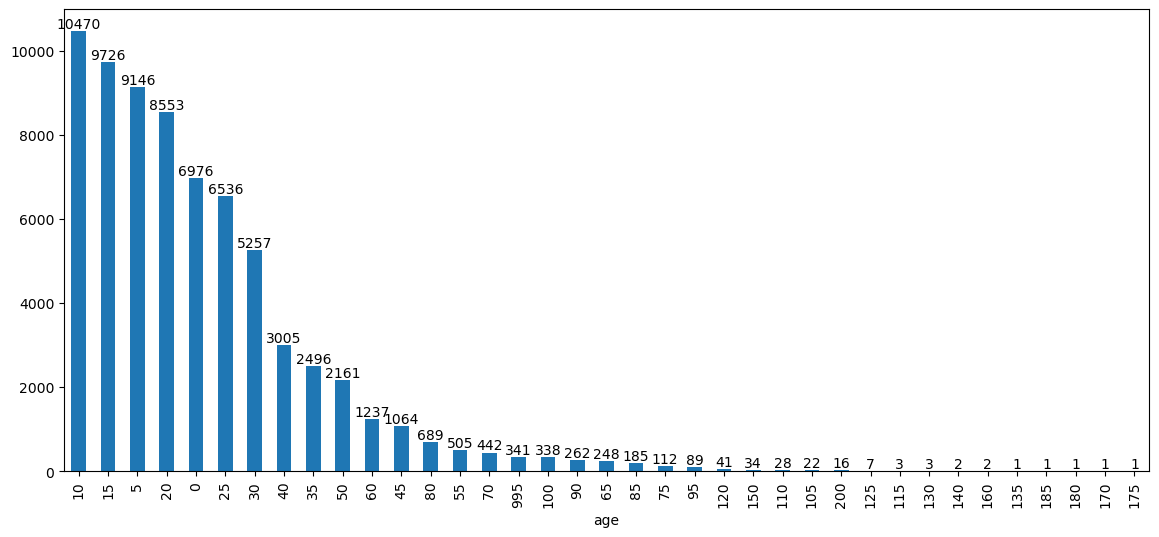

In [18]:
ax=dr_tr.age.value_counts().plot(kind='bar',figsize=(14,6))
for i in ax.containers:
    ax.bar_label(i)

In [19]:
dr_tr.area_percentage.value_counts()

area_percentage
6     9693
7     8475
80    8276
5     7406
8     6448
      ... 
76       1
67       1
70       1
72       1
62       1
Name: count, Length: 68, dtype: int64

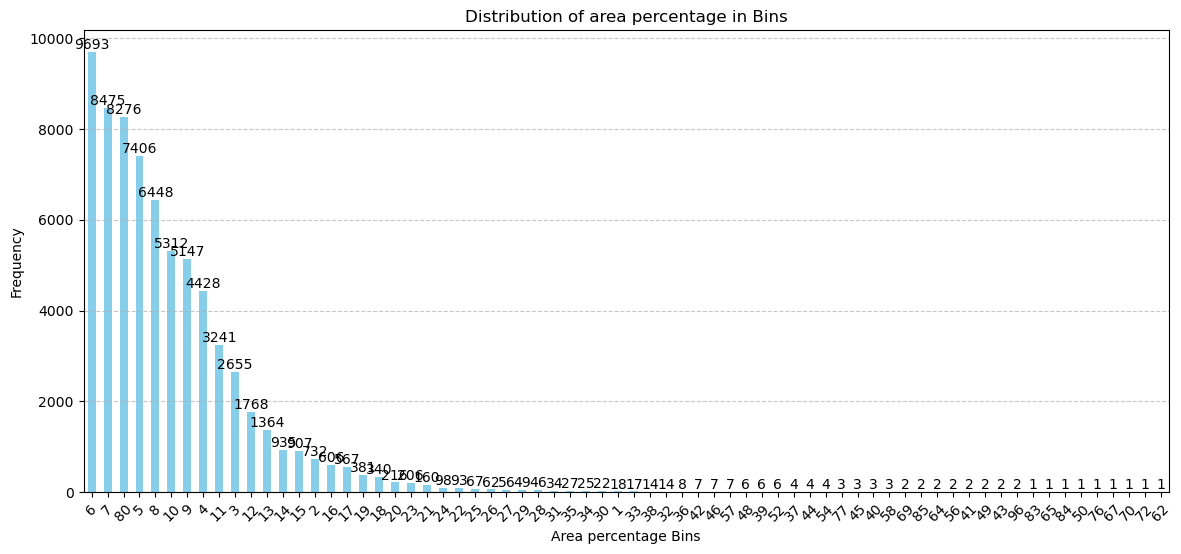

In [20]:
ax=dr_tr.area_percentage.value_counts().plot(kind='bar', color='skyblue',figsize=(14, 6),title='Distribution of area percentage in Bins',
                                                                        xlabel='Area percentage Bins',ylabel='Frequency')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
dr_tr.height_percentage.value_counts()

height_percentage
5     21153
6     12303
4     10186
7      9472
3      7048
8      3713
2      2523
9      1428
10     1379
12      226
11      226
13      168
15       59
16       35
18       21
32       21
14       14
20       10
23        4
17        4
19        3
21        2
24        2
25        1
Name: count, dtype: int64

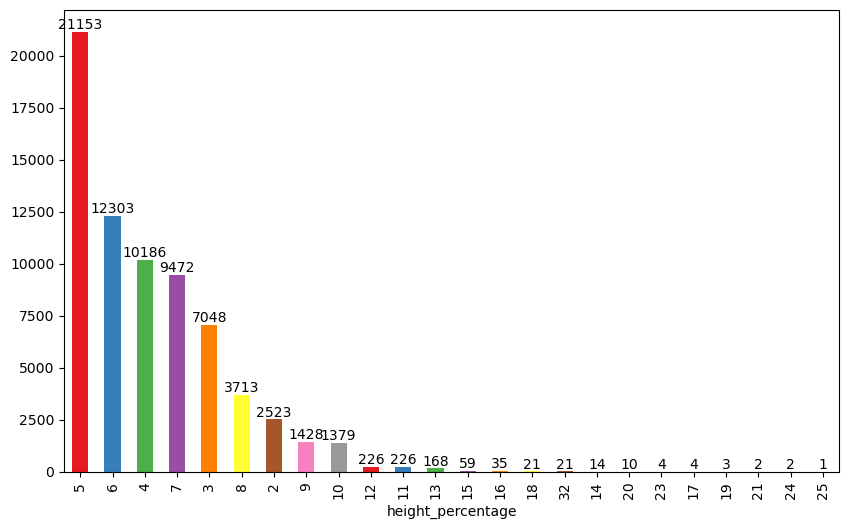

In [22]:
ax=dr_tr.height_percentage.value_counts().plot(kind='bar',figsize=(10, 6),color=sns.color_palette('Set1'))
for i in ax.containers:
    ax.bar_label(i)

In [23]:
dr_tr.land_surface_condition.value_counts()

land_surface_condition
t    58193
n     9581
o     2227
Name: count, dtype: int64

<Axes: ylabel='count'>

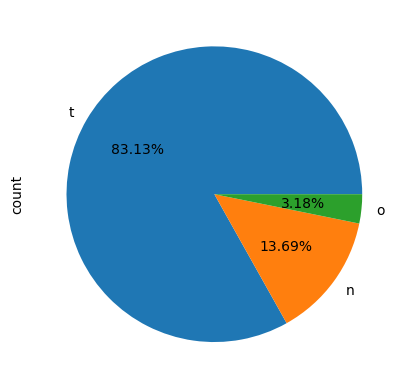

In [24]:
dr_tr.land_surface_condition.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [25]:
dr_tr.foundation_type.value_counts()

foundation_type
r    58784
w     4025
u     3938
i     2863
h      391
Name: count, dtype: int64

<Axes: ylabel='count'>

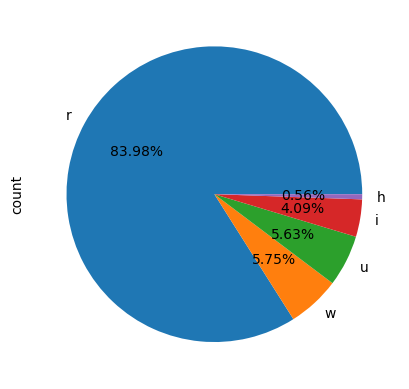

In [26]:
dr_tr.foundation_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [27]:
dr_tr['roof_type'].value_counts()

roof_type
n    49115
q    16540
x     4346
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Roof Types'}, ylabel='count'>

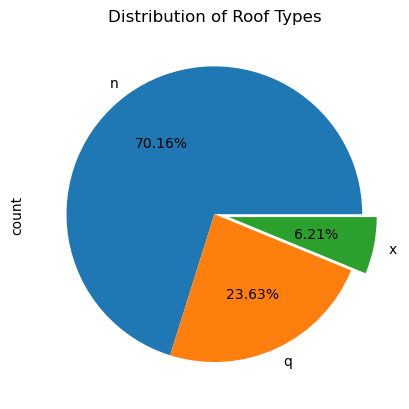

In [28]:
dr_tr['roof_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1],title='Distribution of Roof Types')

In [29]:
dr_tr.ground_floor_type.value_counts()

ground_floor_type
f    56260
x     6700
v     6652
z      270
m      119
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Ground Floor Types'}, ylabel='count'>

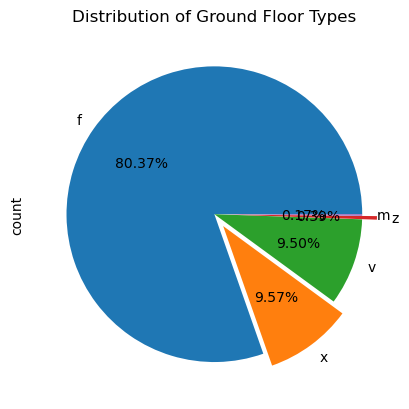

In [30]:
dr_tr.ground_floor_type.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1,0,0.1,0],title='Distribution of Ground Floor Types')

In [31]:
dr_tr.other_floor_type.value_counts()

other_floor_type
q    44488
x    11495
j    10748
s     3270
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Other Floor Types'}, ylabel='count'>

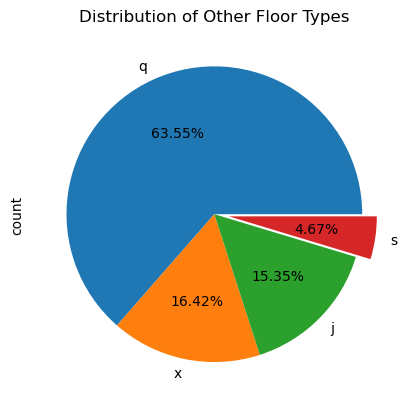

In [32]:
dr_tr.other_floor_type.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0,0.1],title='Distribution of Other Floor Types')

In [33]:
dr_tr['position'].value_counts()

position
s    54272
t    11493
j     3587
o      649
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Positions Types'}, ylabel='count'>

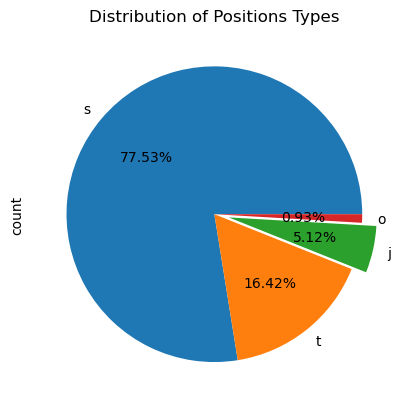

In [34]:
dr_tr.position.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1,0],title='Distribution of Positions Types')

In [35]:
dr_tr.plan_configuration.value_counts()

plan_configuration
d    67157
q     1551
u      969
c       98
s       88
a       62
o       48
m       12
n       10
f        6
Name: count, dtype: int64

In [36]:
dr_tr['has_superstructure_adobe_mud'].value_counts()

has_superstructure_adobe_mud
0    63857
1     6144
Name: count, dtype: int64

<Axes: ylabel='count'>

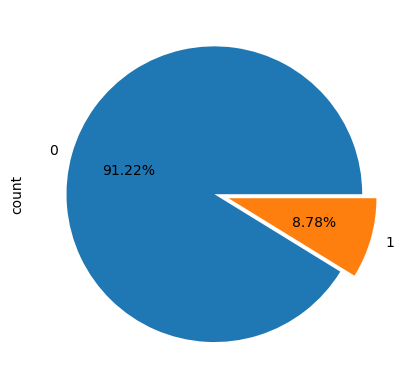

In [37]:
dr_tr.has_superstructure_adobe_mud.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [38]:
dr_tr.has_superstructure_mud_mortar_stone.value_counts()

has_superstructure_mud_mortar_stone
1    53245
0    16756
Name: count, dtype: int64

<Axes: ylabel='count'>

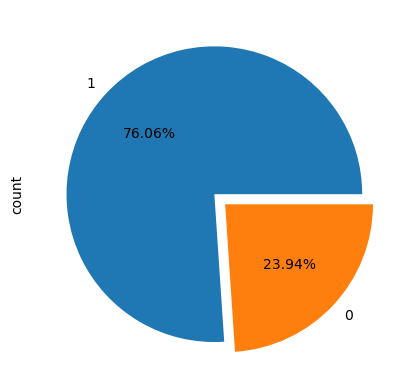

In [39]:
dr_tr.has_superstructure_mud_mortar_stone.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [40]:
dr_tr.has_superstructure_stone_flag.value_counts()

has_superstructure_stone_flag
0    67638
1     2363
Name: count, dtype: int64

<Axes: ylabel='count'>

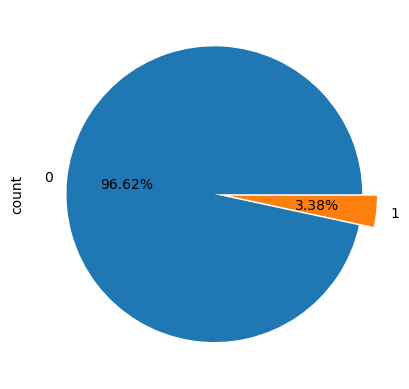

In [41]:
dr_tr.has_superstructure_stone_flag.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [42]:
dr_tr.has_superstructure_cement_mortar_stone.value_counts()

has_superstructure_cement_mortar_stone
0    68733
1     1268
Name: count, dtype: int64

<Axes: ylabel='count'>

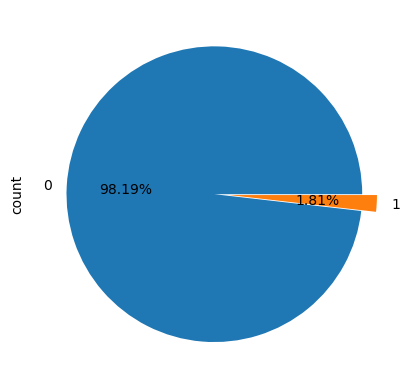

In [43]:
dr_tr.has_superstructure_cement_mortar_stone.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [44]:
dr_tr.has_superstructure_mud_mortar_brick.value_counts()

has_superstructure_mud_mortar_brick
0    65075
1     4926
Name: count, dtype: int64

<Axes: ylabel='count'>

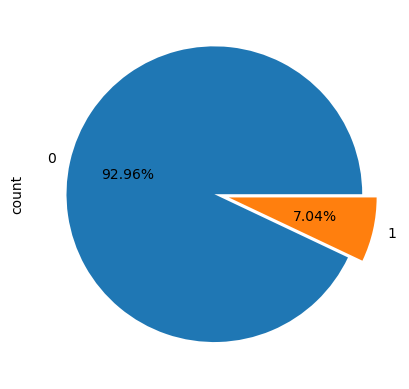

In [45]:
dr_tr.has_superstructure_mud_mortar_brick.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [46]:
dr_tr.has_superstructure_cement_mortar_brick.value_counts()

has_superstructure_cement_mortar_brick
0    64707
1     5294
Name: count, dtype: int64

<Axes: ylabel='count'>

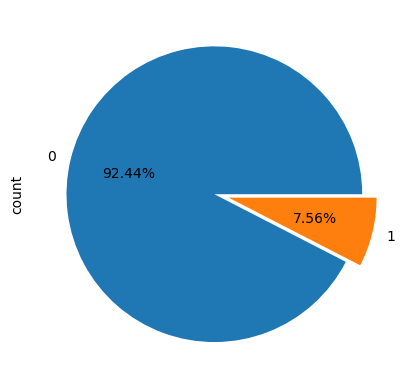

In [47]:
dr_tr.has_superstructure_cement_mortar_brick.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [48]:
dr_tr.has_superstructure_timber.value_counts()

has_superstructure_timber
0    52329
1    17672
Name: count, dtype: int64

<Axes: ylabel='count'>

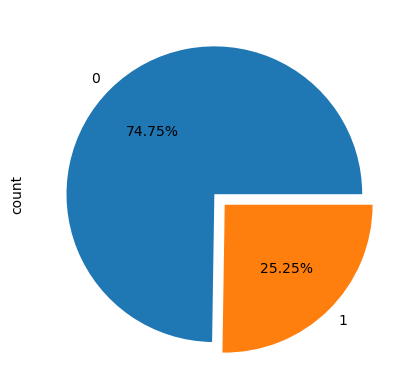

In [49]:
dr_tr.has_superstructure_timber.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [50]:
dr_tr.has_superstructure_bamboo.value_counts()

has_superstructure_bamboo
0    64061
1     5940
Name: count, dtype: int64

<Axes: ylabel='count'>

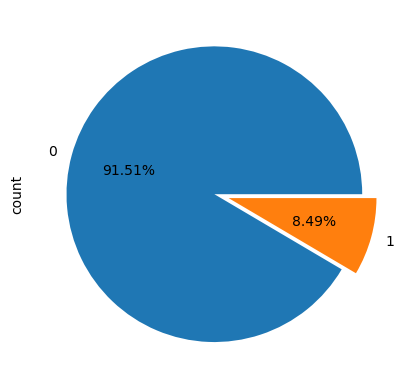

In [51]:
dr_tr.has_superstructure_bamboo.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [52]:
dr_tr.has_superstructure_rc_non_engineered.value_counts()

has_superstructure_rc_non_engineered
0    66920
1     3081
Name: count, dtype: int64

<Axes: ylabel='count'>

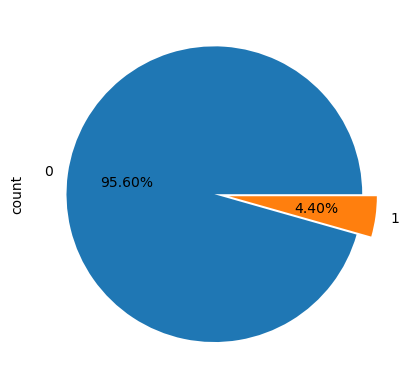

In [53]:
dr_tr.has_superstructure_rc_non_engineered.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [54]:
dr_tr.has_superstructure_rc_engineered.value_counts()

has_superstructure_rc_engineered
0    68899
1     1102
Name: count, dtype: int64

<Axes: ylabel='count'>

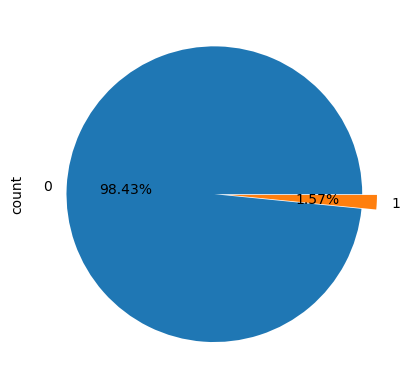

In [55]:
dr_tr.has_superstructure_rc_engineered.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [56]:
dr_tr.has_superstructure_other.value_counts()

has_superstructure_other
0    68939
1     1062
Name: count, dtype: int64

In [57]:
dr_tr.legal_ownership_status.value_counts()

legal_ownership_status
v    67433
a     1457
w      697
r      414
Name: count, dtype: int64

<Axes: xlabel='legal_ownership_status'>

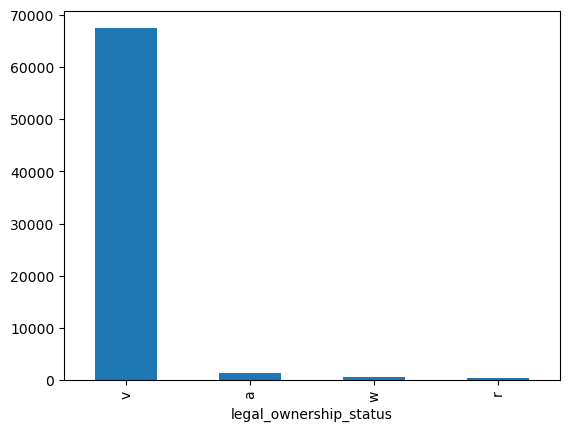

In [58]:
dr_tr.legal_ownership_status.value_counts().plot(kind='bar')

In [59]:
dr_tr.count_families.value_counts()

count_families
1    60594
0     5768
2     3038
3      456
4      108
5       27
6        5
7        2
9        2
8        1
Name: count, dtype: int64

In [60]:
dr_tr.has_secondary_use.value_counts()

has_secondary_use
0    62168
1     7833
Name: count, dtype: int64

<Axes: ylabel='count'>

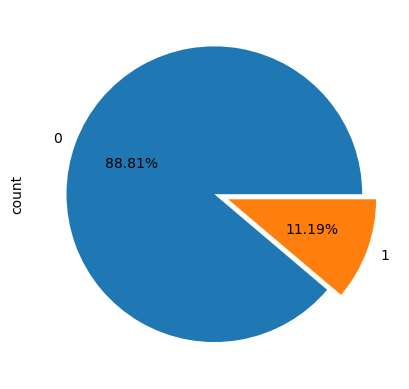

In [61]:
dr_tr.has_secondary_use.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [62]:
dr_tr.has_secondary_use_agriculture.value_counts()

has_secondary_use_agriculture
0    65533
1     4468
Name: count, dtype: int64

<Axes: ylabel='count'>

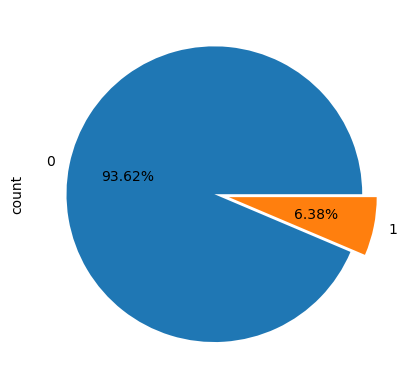

In [63]:
dr_tr.has_secondary_use_agriculture.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [64]:
dr_tr.has_secondary_use_hotel.value_counts()

has_secondary_use_hotel
0    67673
1     2328
Name: count, dtype: int64

<Axes: ylabel='count'>

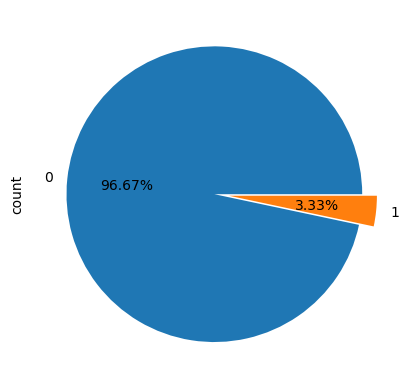

In [65]:
dr_tr.has_secondary_use_hotel.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [66]:
dr_tr.has_secondary_use_rental.value_counts()

has_secondary_use_rental
0    69362
1      639
Name: count, dtype: int64

In [67]:
dr_tr.has_secondary_use_institution.value_counts()

has_secondary_use_institution
0    69935
1       66
Name: count, dtype: int64

In [68]:
dr_tr.has_secondary_use_school.value_counts()

has_secondary_use_school
0    69974
1       27
Name: count, dtype: int64

In [69]:
dr_tr.has_secondary_use_industry.value_counts()

has_secondary_use_industry
0    69938
1       63
Name: count, dtype: int64

In [70]:
dr_tr.has_secondary_use_health_post.value_counts()

has_secondary_use_health_post
0    69989
1       12
Name: count, dtype: int64

In [71]:
dr_tr.has_secondary_use_gov_office.value_counts()

has_secondary_use_gov_office
0    69988
1       13
Name: count, dtype: int64

In [72]:
dr_tr.has_secondary_use_use_police.value_counts()

has_secondary_use_use_police
0    69998
1        3
Name: count, dtype: int64

In [73]:
dr_tr.has_secondary_use_other.value_counts()

has_secondary_use_other
0    69632
1      369
Name: count, dtype: int64

In [74]:
dr_tr.damage_grade.value_counts()

damage_grade
2    36897
3    23395
1     9709
Name: count, dtype: int64

<Axes: ylabel='count'>

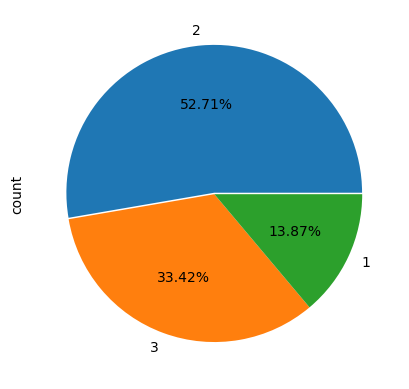

In [75]:
dr_tr.damage_grade.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.01,0,0])

# Converting datatype from int to object

In [76]:
dr_tr.dtypes

count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_timber                  int64
has_superstructure_bamboo                  int64
has_superstructure_rc_non_engineered       int64
has_superstructure_r

In [77]:
dr_tr.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [78]:
int_columns = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','damage_grade']

In [79]:
dr_tr[int_columns] = dr_tr[int_columns].astype('object')

In [80]:
print(dr_tr.dtypes)

count_floors_pre_eq                       object
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud              object
has_superstructure_mud_mortar_stone       object
has_superstructure_stone_flag             object
has_superstructure_cement_mortar_stone    object
has_superstructure_mud_mortar_brick       object
has_superstructure_cement_mortar_brick    object
has_superstructure_timber                 object
has_superstructure_bamboo                 object
has_superstructure_rc_non_engineered      object
has_superstructure_r

# Converting datatype from int to object

In [81]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   count_floors_pre_eq                     8099 non-null   int64 
 1   age                                     8099 non-null   int64 
 2   area_percentage                         8099 non-null   int64 
 3   height_percentage                       8099 non-null   int64 
 4   land_surface_condition                  8099 non-null   object
 5   foundation_type                         8099 non-null   object
 6   roof_type                               8099 non-null   object
 7   ground_floor_type                       8099 non-null   object
 8   other_floor_type                        8099 non-null   object
 9   position                                8099 non-null   object
 10  plan_configuration                      8099 non-null   object
 11  has_

In [82]:
dr_tt.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [83]:
int_columns_tt = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [84]:
dr_tt[int_columns_tt] = dr_tt[int_columns_tt].astype('object')

In [85]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   count_floors_pre_eq                     8099 non-null   object
 1   age                                     8099 non-null   int64 
 2   area_percentage                         8099 non-null   int64 
 3   height_percentage                       8099 non-null   int64 
 4   land_surface_condition                  8099 non-null   object
 5   foundation_type                         8099 non-null   object
 6   roof_type                               8099 non-null   object
 7   ground_floor_type                       8099 non-null   object
 8   other_floor_type                        8099 non-null   object
 9   position                                8099 non-null   object
 10  plan_configuration                      8099 non-null   object
 11  has_

In [86]:
dr_tt.height_percentage.value_counts()

height_percentage
5     2479
6     1437
4     1181
7     1069
3      831
8      412
2      288
9      163
10     136
11      28
13      26
12      25
16       7
18       6
15       3
14       3
32       2
21       1
20       1
23       1
Name: count, dtype: int64

# Data Aggregation

In [87]:
dr_tr.age.groupby(dr_tr.damage_grade).mean()

damage_grade
1    17.446184
2    26.971976
3    27.463347
Name: age, dtype: float64

In [88]:
pd.crosstab(dr_tr.damage_grade,dr_tr.count_floors_pre_eq)

count_floors_pre_eq,1,2,3,4,5,6,7
damage_grade,,,,,,,
1,2817,5270,1233,271,98,17,3
2,5192,23364,7071,837,385,42,6
3,2894,13425,6576,357,133,8,2


In [90]:
pd.crosstab(dr_tr.damage_grade,dr_tr.land_surface_condition)

land_surface_condition,n,o,t
damage_grade,,,
1,1115,241,8353
2,5413,1178,30306
3,3053,808,19534


In [91]:
pd.crosstab(dr_tr.damage_grade,dr_tr.foundation_type)

foundation_type,h,i,r,u,w
damage_grade,,,,,
1,100,1690,5402,1163,1354
2,163,1121,31148,2185,2280
3,128,52,22234,590,391


In [92]:
pd.crosstab(dr_tr.damage_grade,dr_tr.roof_type)

roof_type,n,q,x
damage_grade,,,
1,5798,1733,2178
2,26492,8429,1976
3,16825,6378,192


In [93]:
pd.crosstab(dr_tr.damage_grade,dr_tr.ground_floor_type)

ground_floor_type,f,m,v,x,z
damage_grade,,,,,
1,5797,19,2972,856,65
2,29731,79,3339,3625,123
3,20732,21,341,2219,82


In [94]:
pd.crosstab(dr_tr.damage_grade,dr_tr.other_floor_type)

other_floor_type,j,q,s,x
damage_grade,,,,
1,2775,4029,1561,1344
2,5102,24435,1519,5841
3,2871,16024,190,4310


In [95]:
pd.crosstab(dr_tr.damage_grade,dr_tr.position)

position,j,o,s,t
damage_grade,,,,
1,612,72,7673,1352
2,2001,401,28863,5632
3,974,176,17736,4509


In [96]:
pd.crosstab(dr_tr.damage_grade,dr_tr.plan_configuration)

plan_configuration,a,c,d,f,m,n,o,q,s,u
damage_grade,,,,,,,,,,
1,18,36,9083,0,3,1,15,273,16,264
2,37,52,35459,5,9,5,29,666,61,574
3,7,10,22615,1,0,4,4,612,11,131


In [97]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_adobe_mud)

has_superstructure_adobe_mud,0,1
damage_grade,,
1,9282,427
2,33496,3401
3,21079,2316


In [98]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_mud_mortar_stone)

has_superstructure_mud_mortar_stone,0,1
damage_grade,,
1,5026,4683
2,8655,28242
3,3075,20320


In [99]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_stone_flag)

has_superstructure_stone_flag,0,1
damage_grade,,
1,9571,138
2,35773,1124
3,22294,1101


In [100]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_cement_mortar_stone)

has_superstructure_cement_mortar_stone,0,1
damage_grade,,
1,9434,275
2,36069,828
3,23230,165


In [101]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_mud_mortar_brick )

has_superstructure_mud_mortar_brick,0,1
damage_grade,,
1,9291,418
2,33913,2984
3,21871,1524


In [102]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_cement_mortar_brick )

has_superstructure_cement_mortar_brick,0,1
damage_grade,,
1,7623,2086
2,33958,2939
3,23126,269


In [103]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_timber)

has_superstructure_timber,0,1
damage_grade,,
1,6928,2781
2,26885,10012
3,18516,4879


In [104]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_bamboo)

has_superstructure_bamboo,0,1
damage_grade,,
1,8664,1045
2,33372,3525
3,22025,1370


In [105]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_rc_non_engineered )

has_superstructure_rc_non_engineered,0,1
damage_grade,,
1,8538,1171
2,35374,1523
3,23008,387


In [106]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_rc_engineered)

has_superstructure_rc_engineered,0,1
damage_grade,,
1,8974,735
2,36551,346
3,23374,21


In [107]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_superstructure_other)

has_superstructure_other,0,1
damage_grade,,
1,9474,235
2,36325,572
3,23140,255


In [108]:
pd.crosstab(dr_tr.damage_grade,dr_tr.legal_ownership_status)

legal_ownership_status,a,r,v,w
damage_grade,,,,
1,506,72,9082,49
2,729,198,35656,314
3,222,144,22695,334


In [109]:
pd.crosstab(dr_tr.damage_grade,dr_tr.count_families)

count_families,0,1,2,3,4,5,6,7,8,9
damage_grade,,,,,,,,,,
1,1233,8009,370,75,14,6,1,1,0,0
2,2971,32188,1474,199,51,10,1,0,1,2
3,1564,20397,1194,182,43,11,3,1,0,0


In [110]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use)

has_secondary_use,0,1
damage_grade,,
1,8191,1518
2,32478,4419
3,21499,1896


In [111]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_agriculture)

has_secondary_use_agriculture,0,1
damage_grade,,
1,9274,435
2,34260,2637
3,21999,1396


In [112]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_hotel)

has_secondary_use_hotel,0,1
damage_grade,,
1,9017,692
2,35645,1252
3,23011,384


In [113]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_rental)

has_secondary_use_rental,0,1
damage_grade,,
1,9422,287
2,36595,302
3,23345,50


In [114]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_institution)

has_secondary_use_institution,0,1
damage_grade,,
1,9683,26
2,36862,35
3,23390,5


In [115]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_school)

has_secondary_use_school,0,1
damage_grade,,
1,9698,11
2,36887,10
3,23389,6


In [116]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_industry)

has_secondary_use_industry,0,1
damage_grade,,
1,9694,15
2,36862,35
3,23382,13


In [117]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_health_post)

has_secondary_use_health_post,0,1
damage_grade,,
1,9705,4
2,36891,6
3,23393,2


In [118]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_gov_office)

has_secondary_use_gov_office,0,1
damage_grade,,
1,9706,3
2,36889,8
3,23393,2


In [119]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_use_police)

has_secondary_use_use_police,0,1
damage_grade,,
1,9709,0
2,36896,1
3,23393,2


In [120]:
pd.crosstab(dr_tr.damage_grade,dr_tr.has_secondary_use_other)

has_secondary_use_other,0,1
damage_grade,,
1,9631,78
2,36684,213
3,23317,78


# Hypothesis Testing
### Test Null there is no significance difference age to damage grade is equal

In [121]:
dr_tr.age.groupby(dr_tr.damage_grade).mean()

damage_grade
1    17.446184
2    26.971976
3    27.463347
Name: age, dtype: float64

In [122]:
dr_tr.age.groupby(dr_tr.damage_grade).var()

damage_grade
1    4338.355288
2    5438.588709
3    4419.448889
Name: age, dtype: float64

In [123]:
# Null hypothesis: There is no significance difference between average age of the buildings to the different damage_grade classes
# Alt hypothesis: There is significance difference between average age of the buildings to the different damage_grade classes

In [124]:
from scipy.stats import f_oneway

In [125]:
one=dr_tr[dr_tr['damage_grade']==1]
two=dr_tr[dr_tr['damage_grade']==2]
three=dr_tr[dr_tr['damage_grade']==3]

In [126]:
f_oneway(one.age,two.age,three.age)
# since pvalue=7.892259720850287e-177 is lessthan 0.05, reject null hypothesis

F_onewayResult(statistic=80.17013928997682, pvalue=1.6686576233870685e-35)

### Test Null there is no difference between damage grade to the average area_percentage is eqaul

In [127]:
dr_tr.area_percentage.groupby(dr_tr.damage_grade).mean()

damage_grade
1    32.368730
2    12.539746
3    16.506348
Name: area_percentage, dtype: float64

In [128]:
# Null hypothesis: There is no significance difference between damage grade to the average area percentage 
# Alternative hypothesis: There is significance difference between damage grade to the average area percentage 

In [129]:
f_oneway(one.area_percentage,two.area_percentage,three.area_percentage)
# since pvalue=0.0 is lessthan 0.05, reject null

F_onewayResult(statistic=2949.1939107851354, pvalue=0.0)

### Test Null no association in between damage grade to the families 

In [130]:
pd.crosstab(dr_tr.damage_grade,dr_tr.count_families)

count_families,0,1,2,3,4,5,6,7,8,9
damage_grade,,,,,,,,,,
1,1233,8009,370,75,14,6,1,1,0,0
2,2971,32188,1474,199,51,10,1,0,1,2
3,1564,20397,1194,182,43,11,3,1,0,0


In [131]:
from scipy.stats import chi2_contingency

In [132]:
chi2_contingency(pd.crosstab(dr_tr.damage_grade,dr_tr.count_families))
# since pvalue=3.3091998316384636e-31 is lessthan 0.05, reject null

Chi2ContingencyResult(statistic=402.06402770008106, pvalue=3.396648448734225e-74, dof=18, expected_freq=array([[8.00010171e+02, 8.40426774e+03, 4.21364581e+02, 6.32462965e+01,
        1.49793860e+01, 3.74484650e+00, 6.93490093e-01, 2.77396037e-01,
        1.38698019e-01, 2.77396037e-01],
       [3.04026937e+03, 3.19386411e+04, 1.60130692e+03, 2.40354166e+02,
        5.69259868e+01, 1.42314967e+01, 2.63546235e+00, 1.05418494e+00,
        5.27092470e-01, 1.05418494e+00],
       [1.92772046e+03, 2.02510911e+04, 1.01532850e+03, 1.52399537e+02,
        3.60946272e+01, 9.02365680e+00, 1.67104756e+00, 6.68419023e-01,
        3.34209511e-01, 6.68419023e-01]]))

### Test Null no association between damage grade to the different roof types

In [133]:
pd.crosstab(dr_tr.damage_grade,dr_tr.roof_type)

roof_type,n,q,x
damage_grade,,,
1,5798,1733,2178
2,26492,8429,1976
3,16825,6378,192


In [134]:
chi2_contingency(pd.crosstab(dr_tr.damage_grade,dr_tr.roof_type))
# Since pvalues is less than 0.05, reject null

Chi2ContingencyResult(statistic=5706.424674939182, pvalue=0.0, dof=4, expected_freq=array([[ 6812.15318353,  2294.06522764,   602.78158883],
       [25888.14666933,  8718.10945558,  2290.74387509],
       [16414.70014714,  5527.82531678,  1452.47453608]]))

### Test Null no association between damage grade to the different positions

In [135]:
pd.crosstab(dr_tr.damage_grade,dr_tr.position)

position,j,o,s,t
damage_grade,,,,
1,612,72,7673,1352
2,2001,401,28863,5632
3,974,176,17736,4509


In [136]:
chi2_contingency(pd.crosstab(dr_tr.damage_grade,dr_tr.position))
# since pvalue=1.4256823969733215e-55 is less than 0.05, reject null

Chi2ContingencyResult(statistic=293.2879660455369, pvalue=2.242584422704171e-60, dof=6, expected_freq=array([[  497.50979272,    90.01501407,  7527.41886544,  1594.05632777],
       [ 1890.68069028,   342.0830131 , 28606.36253768,  6057.87375895],
       [ 1198.80951701,   216.90197283, 18138.21859688,  3841.06991329]]))

### Test Null no association between damage grade to the different plan configurations

In [137]:
pd.crosstab(dr_tr.damage_grade,dr_tr.plan_configuration)

plan_configuration,a,c,d,f,m,n,o,q,s,u
damage_grade,,,,,,,,,,
1,18,36,9083,0,3,1,15,273,16,264
2,37,52,35459,5,9,5,29,666,61,574
3,7,10,22615,1,0,4,4,612,11,131


In [138]:
chi2_contingency(pd.crosstab(dr_tr.damage_grade,dr_tr.plan_configuration))
# since pvalue=1.1685268279057031e-52 is less than 0.05, reject null

Chi2ContingencyResult(statistic=434.27029647939344, pvalue=6.367196510316284e-81, dof=18, expected_freq=array([[8.59927715e+00, 1.35924058e+01, 9.31454284e+03, 8.32188112e-01,
        1.66437622e+00, 1.38698019e+00, 6.65750489e+00, 2.15120627e+02,
        1.22054256e+01, 1.34398380e+02],
       [3.26797331e+01, 5.16550621e+01, 3.53979490e+04, 3.16255482e+00,
        6.32510964e+00, 5.27092470e+00, 2.53004386e+01, 8.17520421e+02,
        4.63841374e+01, 5.10752604e+02],
       [2.07209897e+01, 3.27525321e+01, 2.24445081e+04, 2.00525707e+00,
        4.01051414e+00, 3.34209511e+00, 1.60420565e+01, 5.18358952e+02,
        2.94104370e+01, 3.23849016e+02]]))

# Data Visualization

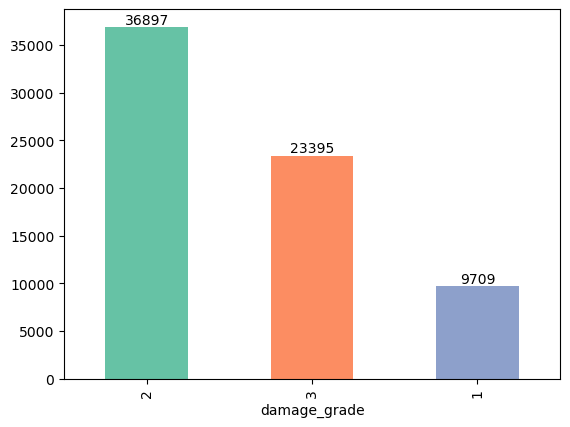

In [139]:
ax=dr_tr.damage_grade.value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
for i in ax.containers:
    ax.bar_label(i)

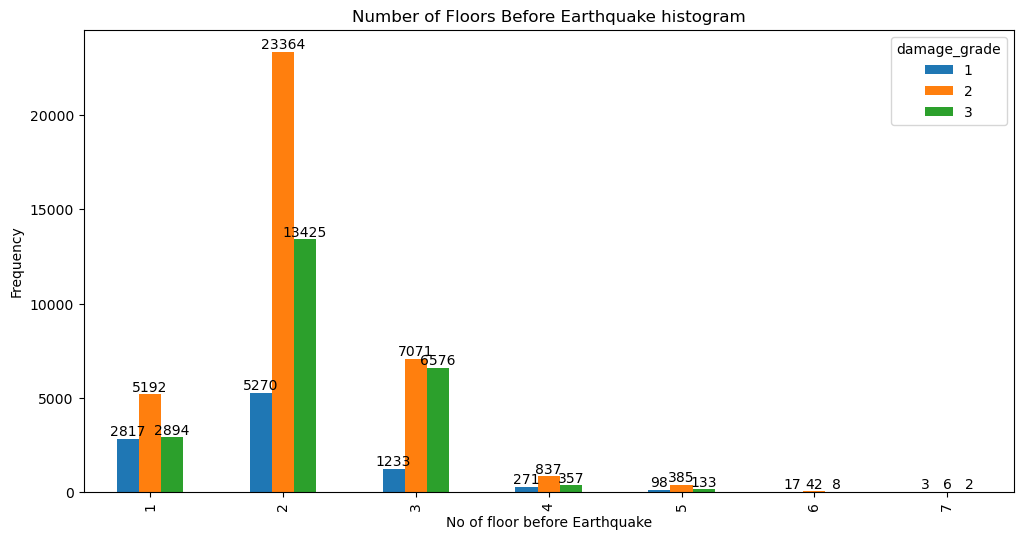

In [140]:
ax=pd.crosstab(dr_tr.count_floors_pre_eq,dr_tr.damage_grade).plot(kind='bar',figsize=(12,6))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('No of floor before Earthquake')
plt.ylabel('Frequency')
plt.title('Number of Floors Before Earthquake histogram')
plt.show()

- From the above graph, we observe that buildings with 2 floors has a significant damage grade, followed by buildings with 3 floors and a floor.
- We also observed that building with 2 floors has a medium damage grade followed by a high damage grade, this also reflect across buildings with 3 floors and a floor.

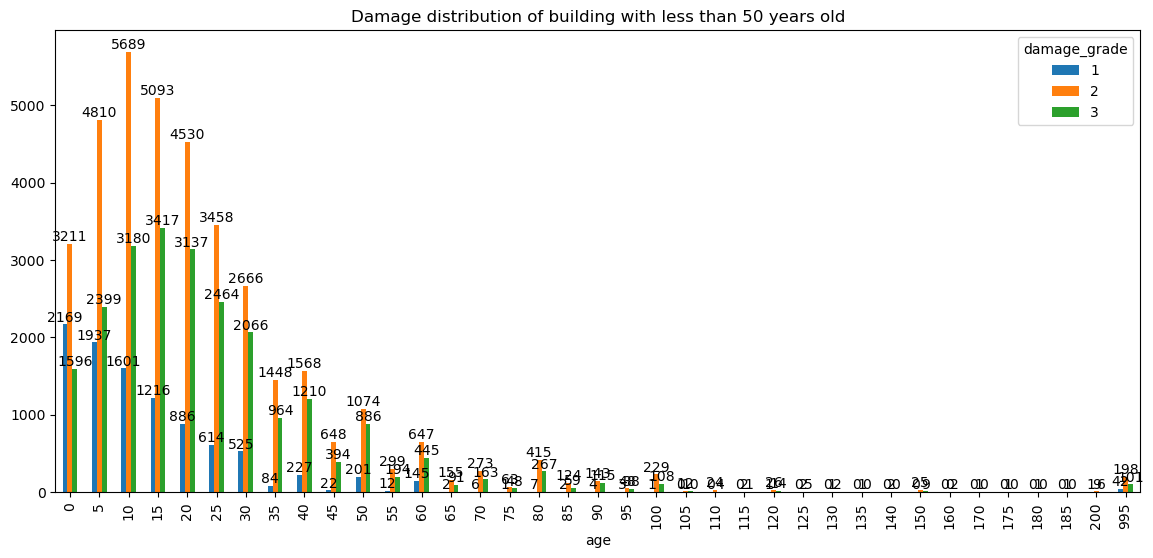

In [141]:
ax=pd.crosstab(dr_tr.age,dr_tr.damage_grade).plot(kind='bar',figsize=(14,6),
                                                  title='Damage distribution of building with less than 50 years old')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('age')
plt.show()

- A significant observation to note from the above chart shows that building with with less than 50 years of age has a dominating damage grade that is medium, with notable increase of damage on buildings between zero to 20 years of age, with a steady decline from 25 years of age to 45 years of age,another interesting observation here is that building with 100 years and 150 years also has a increase in damage grade with severity that is medium.
- This implies that age has a major factor in determining the level of damage that is going to affeat the building

In [142]:
building_data=dr_tr[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status','damage_grade']]

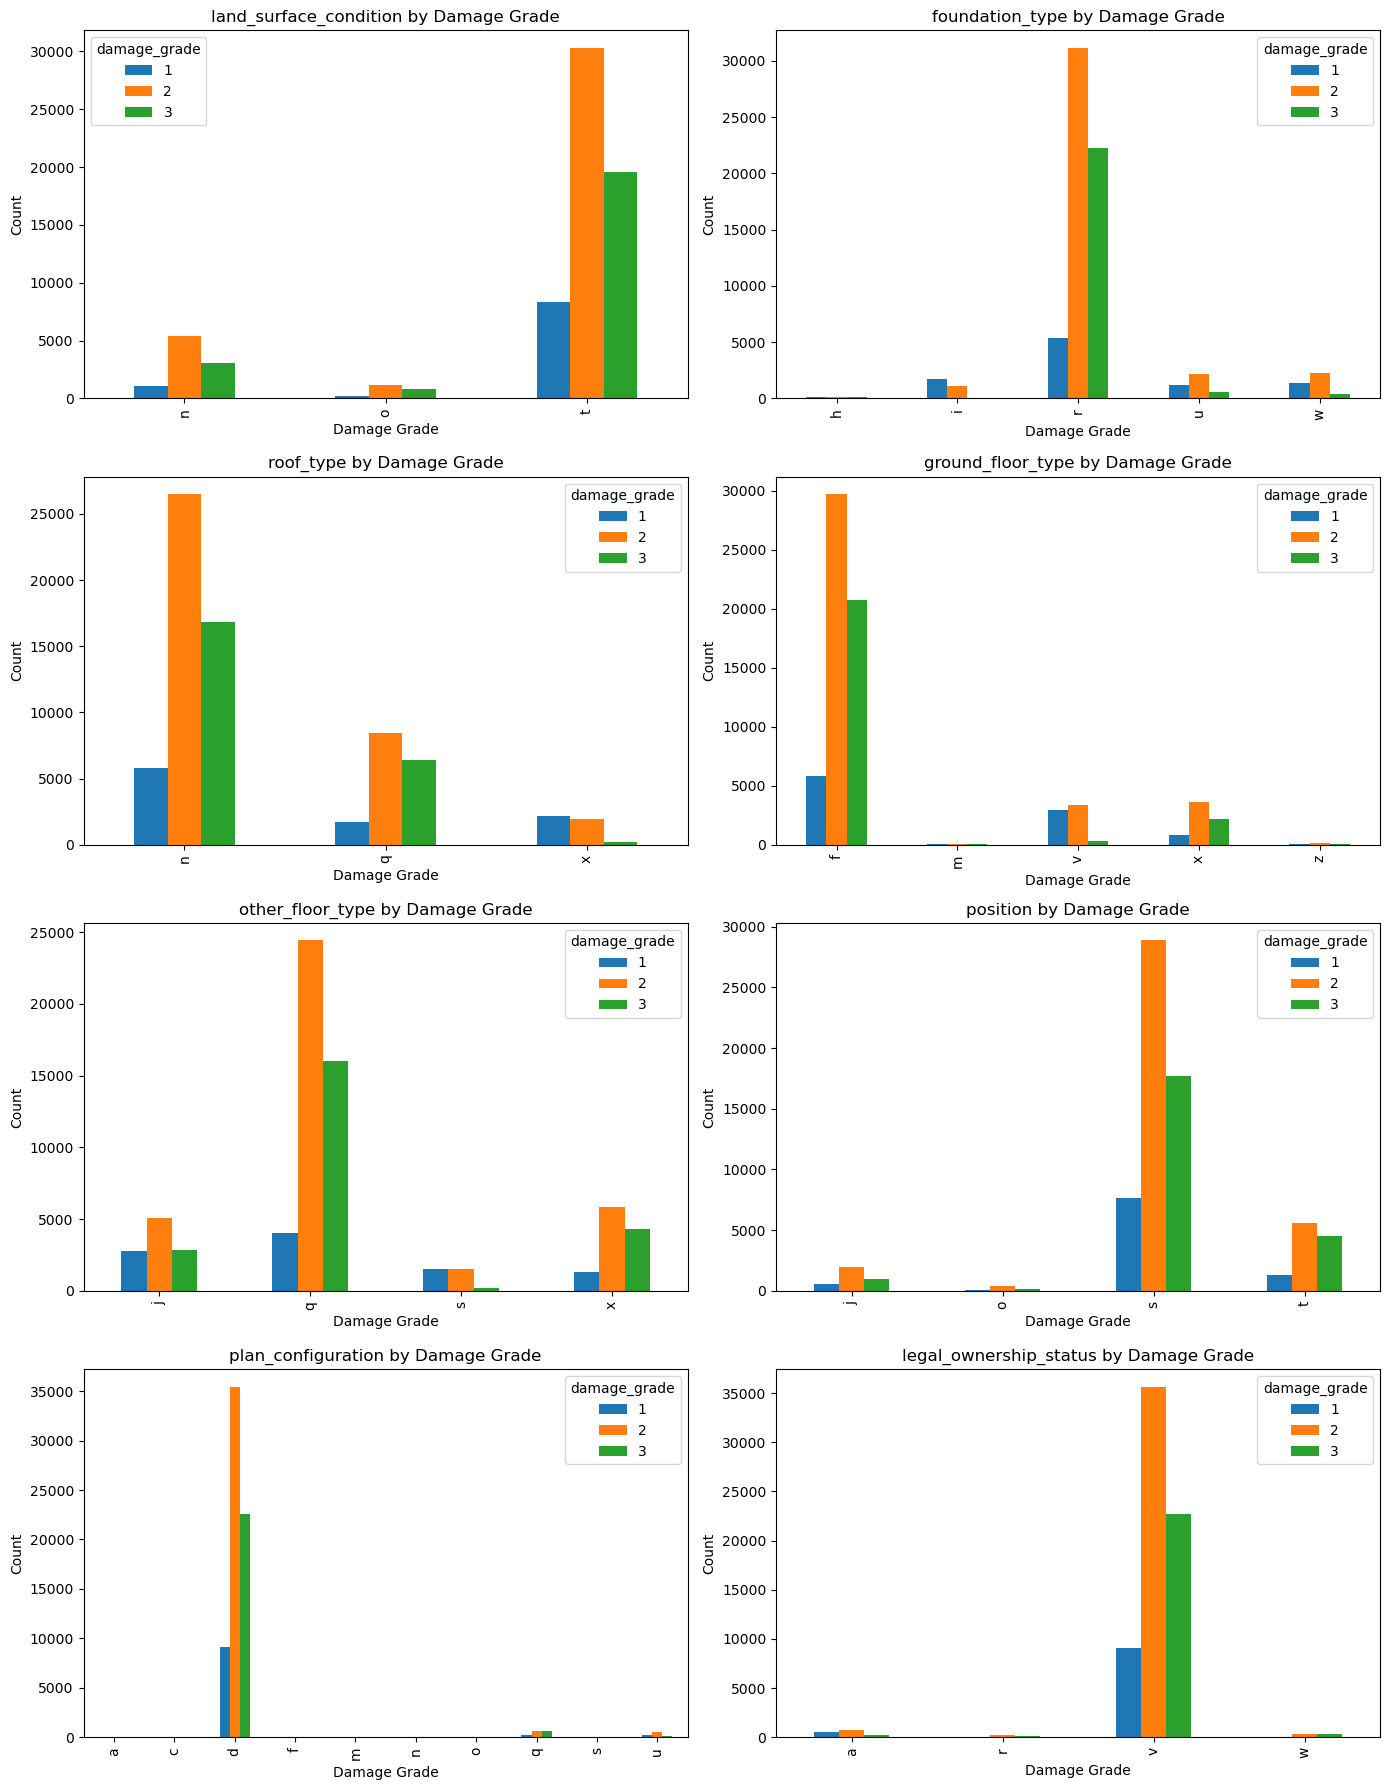

In [143]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
# Flatten axes for easier indexing
axes = axes.flatten()
# Group by damage grade and plot value counts for each characteristic within each group
for i, (feature, values) in enumerate(building_data.drop('damage_grade', axis=1).items()):
    ax = axes[i]
    grouped_data = building_data.groupby(feature)['damage_grade'].value_counts().unstack(fill_value=0)
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_title(f"{feature} by Damage Grade")
    ax.set_xlabel('Damage Grade')
    ax.set_ylabel('Count')
# Adjust layout
plt.tight_layout()
plt.show()

# insights
- Looking at the land surface condition of the building, the type T has a significant impact on the severity of damage on the building.
- Looking at the foundation type, we can observe that floor type of the value R has a significant impact on the severity of damage on the building
- Also ground floor type of the type F has a significant impact on the level of damage on the building
- Many of the of the findings here are observational as we can see, and it show they are going to have a significant impact when building our model

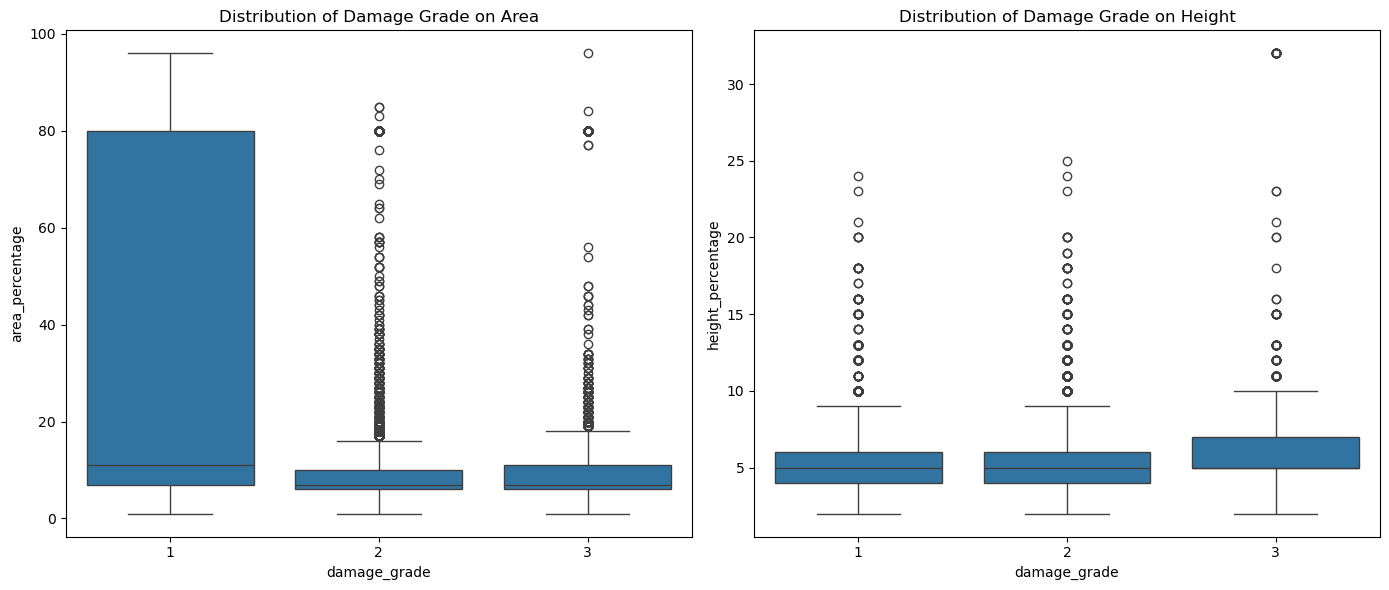

In [144]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Box plot for damage grade vs. area
sns.boxplot(x='damage_grade', y='area_percentage', data=dr_tr, ax=axes[0])
axes[0].set_title('Distribution of Damage Grade on Area')
# Box plot for damage grade vs. height
sns.boxplot(x='damage_grade', y='height_percentage', data=dr_tr, ax=axes[1])
axes[1].set_title('Distribution of Damage Grade on Height')
# Adjust layout
plt.tight_layout()
plt.show()

- The above charts illustrate the distribution damage grade on area and height of building.
- We can see here that most of the damage grade are low damage grade and high damage

# Splitting into numcols and objcols

In [145]:
numcols=dr_tr.select_dtypes(include=np.number)
objcols=dr_tr.select_dtypes(include='object')

In [146]:
numcols.head()

,age,area_percentage,height_percentage
0,30,6,5
1,0,8,2
2,10,7,2
3,15,11,6
4,25,7,4


In [147]:
objcols.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,2,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,1,t,w,n,f,j,s,d,0,0,0,0,0,0,0,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,n,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,2,t,u,q,f,x,s,d,0,0,0,0,0,1,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,1,t,u,n,v,j,j,d,0,0,0,0,0,1,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,1


<Axes: >

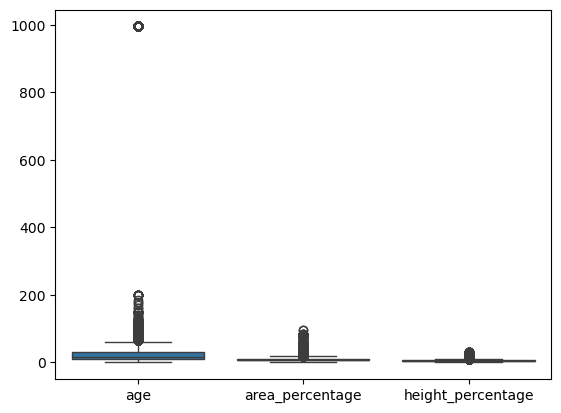

In [148]:
sns.boxplot(numcols)

In [149]:
numcols.describe()

,age,area_percentage,height_percentage
count,70001.000000,70001.000000,70001.000000
mean,25.814988,16.615663,5.425237
std,70.402968,23.571508,1.911585
min,0.000000,1.000000,2.000000
25%,10.000000,6.000000,4.000000
50%,15.000000,8.000000,5.000000
75%,30.000000,11.000000,6.000000
max,995.000000,96.000000,32.000000


# Scaling the numcols

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc=StandardScaler()

In [152]:
numcols_sc=sc.fit_transform(numcols)

In [153]:
numcols_sc=pd.DataFrame(numcols_sc,columns=numcols.columns)

In [154]:
numcols_sc.head()

,age,area_percentage,height_percentage
0,0.059444,-0.450363,-0.222454
1,-0.366677,-0.365514,-1.791844
2,-0.224637,-0.407939,-1.791844
3,-0.153617,-0.238241,0.300676
4,-0.011576,-0.407939,-0.745584


<Axes: >

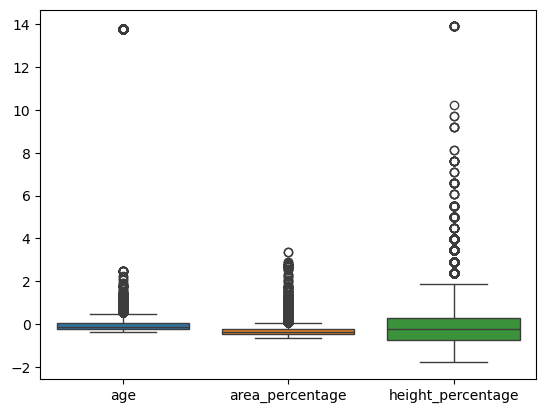

In [155]:
sns.boxplot(numcols_sc)

# Minmax Scaler

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
mm=MinMaxScaler()

In [158]:
numcols_mm=mm.fit_transform(numcols)

In [159]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

In [160]:
numcols_mm.head()

,age,area_percentage,height_percentage
0,0.030151,0.052632,0.100000
1,0.000000,0.073684,0.000000
2,0.010050,0.063158,0.000000
3,0.015075,0.105263,0.133333
4,0.025126,0.063158,0.066667


<Axes: >

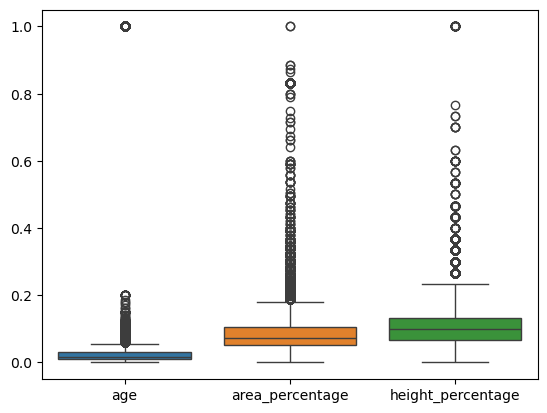

In [161]:
sns.boxplot(numcols_mm)

# Robust Scaler

In [162]:
from sklearn.preprocessing import RobustScaler

In [163]:
rc=RobustScaler()

In [164]:
numcols_rb=rc.fit_transform(numcols)

In [165]:
numcols_rb=pd.DataFrame(numcols_rb,columns=numcols.columns)

In [166]:
numcols_rb.head()

,age,area_percentage,height_percentage
0,0.75,-0.4,0.0
1,-0.75,0.0,-1.5
2,-0.25,-0.2,-1.5
3,0.00,0.6,0.5
4,0.50,-0.2,-0.5


<Axes: >

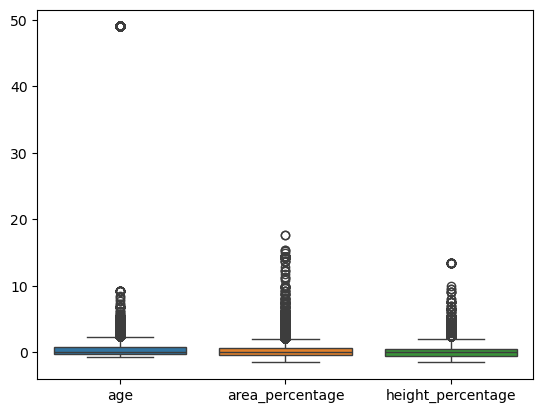

In [167]:
sns.boxplot(numcols_rb)

# converting object data into numerical(Label Encoding) 

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
lb=LabelEncoder()

In [170]:
objcols=objcols.apply(LabelEncoder().fit_transform)

In [171]:
objcols.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
1,0,2,4,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
3,1,2,3,1,0,3,2,2,0,0,0,0,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2,3,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### test objcols label encoding

In [172]:
numcols_tt=dr_tt.select_dtypes(include=np.number)
objcols_tt=dr_tt.select_dtypes(include='object')

In [173]:
numcols_tt.head()

,age,area_percentage,height_percentage
0,20,6,5
1,25,8,2
2,5,7,2
3,0,11,6
4,15,7,4


In [174]:
numcols_tt_mm=mm.fit_transform(numcols_tt)

In [175]:
numcols_tt_mm=pd.DataFrame(numcols_tt_mm,columns=numcols_tt.columns)

In [176]:
numcols_tt_mm.head()

,age,area_percentage,height_percentage
0,0.020101,0.052632,0.100000
1,0.025126,0.073684,0.000000
2,0.005025,0.063158,0.000000
3,0.000000,0.105263,0.133333
4,0.015075,0.063158,0.066667


In [177]:
objcols_tt.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,3,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,1,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,3,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [178]:
objcols_tt=objcols_tt.apply(LabelEncoder().fit_transform)

In [179]:
objcols_tt.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
2,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0
4,2,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


# Combining the dataframe numcols and objcols

In [180]:
combinedf=pd.concat([numcols_mm,objcols],axis=1)

In [181]:
combinedf.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0.030151,0.052632,0.100000,1,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
1,0.000000,0.073684,0.000000,0,2,4,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.010050,0.063158,0.000000,0,0,2,0,0,0,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
3,0.015075,0.105263,0.133333,1,2,3,1,0,3,2,2,0,0,0,0,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.025126,0.063158,0.066667,0,2,3,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
dr_tt=pd.concat([numcols_tt_mm,objcols_tt],axis=1)

In [183]:
dr_tt.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0.020101,0.052632,0.100000,2,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,0.025126,0.073684,0.000000,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
2,0.005025,0.063158,0.000000,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.105263,0.133333,0,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0
4,0.015075,0.063158,0.066667,2,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


# Splitting into Dependent(y) and Independent variables(X's)

In [184]:
X=combinedf.drop('damage_grade',axis=1)
y=combinedf.damage_grade

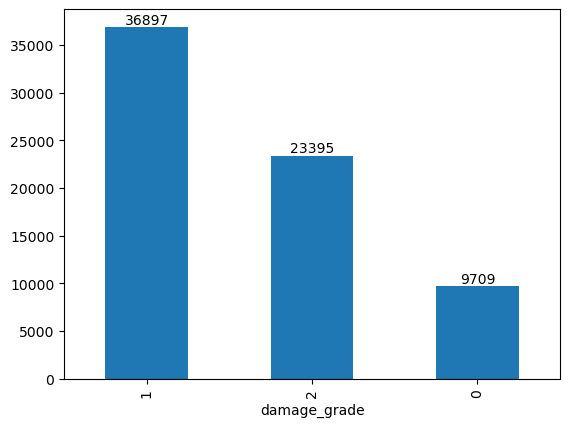

In [185]:
ax=y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='count', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

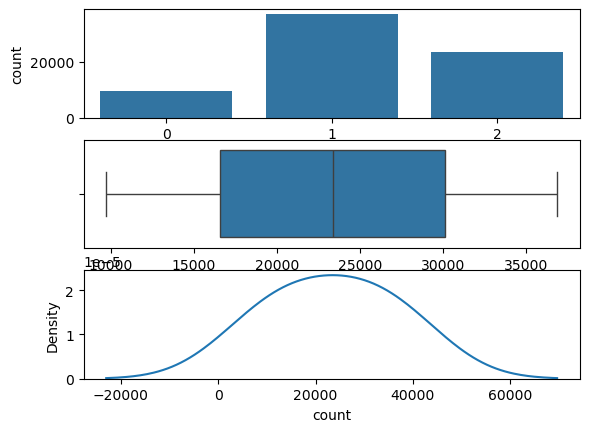

In [186]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.barplot(y.value_counts(),ax=ax[0])
sns.boxplot(y.value_counts(),orient='h',ax=ax[1])
sns.kdeplot(y.value_counts(),ax=ax[2])

# Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
reg=LogisticRegression(max_iter=1500,multi_class='multinomial')

In [189]:
regmodel=reg.fit(X,y)

In [190]:
regmodel.score(X,y)

0.555592062970529

In [191]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [192]:
cross_val_score(reg,X,y)

array([0.5471752 , 0.54464286, 0.5445    , 0.53357143, 0.45157143])

In [193]:
np.mean([0.57832735, 0.57709133, 0.58008442, 0.58094781, 0.57837682])

0.5789655459999999

In [194]:
y_pred=reg.predict(X)

In [195]:
pd.crosstab(y,y_pred)

col_0,0,1,2
damage_grade,,,
0,3001,5202,1506
1,1879,32489,2529
2,905,19088,3402


In [196]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39      9709
           1       0.57      0.88      0.69     36897
           2       0.46      0.15      0.22     23395

    accuracy                           0.56     70001
   macro avg       0.52      0.45      0.43     70001
weighted avg       0.53      0.56      0.49     70001



- when we see form the classification report the noise in the data is effectiing more in recall and f1-score and also because of imbalance classes in dependent variable.
- So we need to convert the imbalance classes into balance classes in dependent variable by using synthetic classes.

# Decission Tree

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
tree=DecisionTreeClassifier(max_depth=50, criterion='entropy',splitter='random')

In [199]:
treemodel=tree.fit(X,y)

In [200]:
treemodel.score(X,y)

0.869644719361152

In [201]:
cross_val_score(tree,X,y)

array([0.52446254, 0.52614286, 0.51807143, 0.501     , 0.39778571])

In [202]:
np.mean([0.52589101, 0.52278571, 0.51742857, 0.50321429, 0.39735714])

0.49333534399999995

In [203]:
tree_X=treemodel.predict(X)

In [204]:
pd.crosstab(y,tree_X)

col_0,0,1,2
damage_grade,,,
0,8527,746,436
1,821,34608,1468
2,630,5024,17741


In [205]:
print(classification_report(y,tree_X))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      9709
           1       0.86      0.94      0.90     36897
           2       0.90      0.76      0.82     23395

    accuracy                           0.87     70001
   macro avg       0.87      0.86      0.86     70001
weighted avg       0.87      0.87      0.87     70001



In [206]:
treepredict_test=treemodel.predict(dr_tt)

In [207]:
treepredict_tt=pd.DataFrame(treepredict_test)

In [208]:
treepredict_tt.value_counts()

1    4752
2    2366
0     981
Name: count, dtype: int64

In [209]:
treepredict_tt=treepredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [210]:
treepredict_tt.value_counts()

Medium Damage    4752
High Damage      2366
Low Damage        981
Name: count, dtype: int64

# Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rf=RandomForestClassifier(max_depth=40,n_estimators=100)

In [213]:
rfmodel=rf.fit(X,y)

In [214]:
rfmodel.score(X,y)

0.8684304509935572

In [215]:
cross_val_score(rf,X,y)

array([0.56624527, 0.56221429, 0.56692857, 0.53907143, 0.431     ])

In [216]:
np.mean([0.61431494, 0.66699267, 0.66945085, 0.70187173, 0.7036704 ])

0.671260118

In [217]:
rfpredict_X=rfmodel.predict(X)

In [218]:
pd.crosstab(y,rfpredict_X)

col_0,0,1,2
damage_grade,,,
0,7952,1104,653
1,418,34453,2026
2,343,4666,18386


In [219]:
print(classification_report(y,rfpredict_X))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      9709
           1       0.86      0.93      0.89     36897
           2       0.87      0.79      0.83     23395

    accuracy                           0.87     70001
   macro avg       0.88      0.85      0.86     70001
weighted avg       0.87      0.87      0.87     70001



In [220]:
rfpredict_test=rfmodel.predict(dr_tt)

In [221]:
rfpredict_tt=pd.DataFrame(rfpredict_test)

In [222]:
rfpredict_tt.value_counts()

1    5533
2    2011
0     555
Name: count, dtype: int64

In [223]:
rfpredict_tt=rfpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [224]:
rfpredict_tt.value_counts()

Medium Damage    5533
High Damage      2011
Low Damage        555
Name: count, dtype: int64

# GBM

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [226]:
gbc=GradientBoostingClassifier(max_depth=20)

In [227]:
gbcmodel=gbc.fit(X,y)

In [228]:
gbc.score(X,y)

0.8696590048713589

In [229]:
np.mean([0.58720041, 0.63982193, 0.64157158, 0.65413973, 0.65687145]) 

0.6359210200000001

In [230]:
gbc_X=gbc.predict(X)

In [231]:
pd.crosstab(y,gbc_X)

col_0,0,1,2
damage_grade,,,
0,8131,992,586
1,509,34096,2292
2,446,4299,18650


In [232]:
print(classification_report(y,gbc_X))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      9709
           1       0.87      0.92      0.89     36897
           2       0.87      0.80      0.83     23395

    accuracy                           0.87     70001
   macro avg       0.88      0.85      0.86     70001
weighted avg       0.87      0.87      0.87     70001



In [233]:
gbc_test=gbcmodel.predict(dr_tt)

In [234]:
gbcpredict_tt=pd.DataFrame(gbc_test)

In [235]:
gbcpredict_tt.value_counts()

1    5298
2    2231
0     570
Name: count, dtype: int64

In [236]:
gbcpredict_tt=gbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [237]:
gbcpredict_tt.value_counts()

Medium Damage    5298
High Damage      2231
Low Damage        570
Name: count, dtype: int64

# SVC

In [238]:
from sklearn.svm import SVC

In [239]:
svc=SVC(C=8)

In [240]:
svcmodel=svc.fit(X,y)

In [241]:
svcmodel.score(X,y)

0.5781488835873774

In [242]:
np.mean([0.55503178, 0.55507143, 0.556     , 0.53      , 0.4485    ])

0.5289206420000001

In [243]:
svc_X=svc.predict(X)

In [244]:
pd.crosstab(y,svc_X)

col_0,0,1,2
damage_grade,,,
0,3201,4594,1914
1,1659,31747,3491
2,438,17434,5523


In [245]:
print(classification_report(y,svc_X))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43      9709
           1       0.59      0.86      0.70     36897
           2       0.51      0.24      0.32     23395

    accuracy                           0.58     70001
   macro avg       0.57      0.48      0.48     70001
weighted avg       0.56      0.58      0.54     70001



In [246]:
svc_test=svcmodel.predict(dr_tt)

In [247]:
svcpredict_tt=pd.DataFrame(svc_test)

In [248]:
svcpredict_tt.value_counts()

1    7077
2     664
0     358
Name: count, dtype: int64

In [249]:
svcpredict_tt=svcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [250]:
svcpredict_tt.value_counts()

Medium Damage    7077
High Damage       664
Low Damage        358
Name: count, dtype: int64

# KNN

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
knc=KNeighborsClassifier(n_neighbors=1,weights='distance')

In [253]:
kncmodel=knc.fit(X,y)

In [254]:
kncmodel.score(X,y)

0.8447307895601491

In [255]:
cross_val_score(knc,X,y)

array([0.52239126, 0.51492857, 0.5155    , 0.49735714, 0.42721429])

In [256]:
np.mean([0.52239126, 0.51492857, 0.5155    , 0.49735714, 0.42721429])

0.495478252

In [257]:
knc_X=knc.predict(X)

In [258]:
pd.crosstab(y,knc_X)

col_0,0,1,2
damage_grade,,,
0,8024,984,701
1,843,32085,3969
2,584,3788,19023


In [259]:
print(classification_report(y,knc_X))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      9709
           1       0.87      0.87      0.87     36897
           2       0.80      0.81      0.81     23395

    accuracy                           0.84     70001
   macro avg       0.84      0.84      0.84     70001
weighted avg       0.84      0.84      0.84     70001



In [260]:
knc_test=kncmodel.predict(dr_tt)

In [261]:
kncpredict_tt=pd.DataFrame(knc_test)

In [262]:
kncpredict_tt.value_counts()

1    4523
2    2675
0     901
Name: count, dtype: int64

In [263]:
kncpredict_tt=kncpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [264]:
kncpredict_tt.value_counts()

Medium Damage    4523
High Damage      2675
Low Damage        901
Name: count, dtype: int64

# Naive bayes

In [265]:
from sklearn.naive_bayes import GaussianNB

In [266]:
gb=GaussianNB()

In [267]:
gbmodel=gb.fit(X,y)

In [268]:
gbmodel.score(X,y)

0.3990514421222554

In [269]:
cross_val_score(gb,X,y)

array([0.47025212, 0.41692857, 0.41271429, 0.37228571, 0.26092857])

In [270]:
np.mean([0.40121429, 0.4165    , 0.42828571, 0.4005    , 0.40628571])

0.41055714200000004

In [271]:
gb_X=gb.predict(X)

In [272]:
pd.crosstab(y,gb_X)

col_0,0,1,2
damage_grade,,,
0,4990,335,4384
1,7187,1998,27712
2,1754,695,20946


In [273]:
print(classification_report(y,gb_X))

              precision    recall  f1-score   support

           0       0.36      0.51      0.42      9709
           1       0.66      0.05      0.10     36897
           2       0.39      0.90      0.55     23395

    accuracy                           0.40     70001
   macro avg       0.47      0.49      0.36     70001
weighted avg       0.53      0.40      0.29     70001



In [274]:
gb_test=gbcmodel.predict(dr_tt)

In [275]:
gbpredict_tt=pd.DataFrame(gb_test)

In [276]:
gbpredict_tt.value_counts()

1    5298
2    2231
0     570
Name: count, dtype: int64

In [277]:
gbrpredict_tt=gbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [278]:
gbrpredict_tt.value_counts()

Medium Damage    5298
High Damage      2231
Low Damage        570
Name: count, dtype: int64

# MultinomialNB

In [279]:
from sklearn.naive_bayes import MultinomialNB

In [280]:
mb=MultinomialNB()

In [281]:
mbmodel=mb.fit(X,y)

In [282]:
mbmodel.score(X,y)

0.5090212996957186

In [283]:
cross_val_score(mb,X,y)

array([0.5298193 , 0.52185714, 0.53114286, 0.49435714, 0.46792857])

In [284]:
np.mean([0.5298193 , 0.52185714, 0.53114286, 0.49435714, 0.46792857])

0.5090210020000001

In [285]:
mb_X=mb.predict(X)

In [286]:
pd.crosstab(y,mb_X)

col_0,0,1,2
damage_grade,,,
0,3341,4203,2165
1,3252,23254,10391
2,432,13926,9037


In [287]:
print(classification_report(y,mb_X))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40      9709
           1       0.56      0.63      0.59     36897
           2       0.42      0.39      0.40     23395

    accuracy                           0.51     70001
   macro avg       0.49      0.45      0.47     70001
weighted avg       0.50      0.51      0.50     70001



In [288]:
mb_test=mbmodel.predict(dr_tt)

In [289]:
mbpredict_tt=pd.DataFrame(mb_test)

In [290]:
mbpredict_tt.value_counts()

1    5072
2    2293
0     734
Name: count, dtype: int64

In [291]:
mbredict_tt=mbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [292]:
mbpredict_tt.value_counts()

1    5072
2    2293
0     734
Name: count, dtype: int64

# BernouliNB

In [293]:
from sklearn.naive_bayes import BernoulliNB

In [294]:
bnb=BernoulliNB()

In [295]:
bnbmodel=bnb.fit(X,y)

In [296]:
bnbmodel.score(X,y)

0.49595005785631635

In [297]:
cross_val_score(bnb,X,y)

array([0.51739161, 0.52228571, 0.51407143, 0.45964286, 0.47014286])

In [298]:
np.mean([0.51739161, 0.52228571, 0.51407143, 0.45964286, 0.47014286])

0.49670689400000007

In [299]:
bnb_X=bnb.predict(X)

In [300]:
pd.crosstab(y,bnb_X)

col_0,0,1,2
damage_grade,,,
0,3979,3882,1848
1,4181,20004,12712
2,774,11887,10734


In [301]:
print(classification_report(y,bnb_X))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43      9709
           1       0.56      0.54      0.55     36897
           2       0.42      0.46      0.44     23395

    accuracy                           0.50     70001
   macro avg       0.48      0.47      0.47     70001
weighted avg       0.50      0.50      0.50     70001



In [302]:
bnb_test=bnbmodel.predict(dr_tt)

In [303]:
bnbpredict_tt=pd.DataFrame(bnb_test)

In [304]:
bnbpredict_tt.value_counts()

1    4175
2    2938
0     986
Name: count, dtype: int64

In [305]:
bnbpredict_tt=bnbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [306]:
bnbpredict_tt.value_counts()

Medium Damage    4175
High Damage      2938
Low Damage        986
Name: count, dtype: int64

# CategoricalNB

In [307]:
from sklearn.naive_bayes import CategoricalNB

In [308]:
cat=CategoricalNB(alpha=10)

In [309]:
catmodel=cat.fit(X,y)

In [310]:
catmodel.score(X,y)

0.5018499735718062

In [311]:
cross_val_score(cat,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 106, in predict
    jll = self._joint_

array([       nan, 0.52485714, 0.52035714, 0.45828571, 0.46942857])

In [312]:
np.mean([ 0.52485714, 0.52035714, 0.45828571, 0.46942857])

0.49323214000000004

In [313]:
catpredict=cat.predict(X)

In [314]:
pd.crosstab(y,catpredict)

col_0,0,1,2
damage_grade,,,
0,3967,3478,2264
1,4079,17032,15786
2,485,8779,14131


In [315]:
print(classification_report(y,catpredict))

              precision    recall  f1-score   support

           0       0.47      0.41      0.43      9709
           1       0.58      0.46      0.51     36897
           2       0.44      0.60      0.51     23395

    accuracy                           0.50     70001
   macro avg       0.50      0.49      0.49     70001
weighted avg       0.52      0.50      0.50     70001



In [316]:
cat_test=catmodel.predict(dr_tt)

In [317]:
catpredict_tt=pd.DataFrame(cat_test)

In [318]:
catpredict_tt.value_counts()

2    3775
1    3349
0     975
Name: count, dtype: int64

In [319]:
catpredict_tt=catpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [320]:
catpredict_tt.value_counts()

High Damage      3775
Medium Damage    3349
Low Damage        975
Name: count, dtype: int64

# LinearSVC

In [321]:
from sklearn.svm import LinearSVC

In [322]:
ls=LinearSVC(C=8,max_iter=4000)

In [323]:
lsmodel=ls.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [324]:
lsmodel.score(X,y)

0.555434922358252

In [325]:
np.mean([0.47921429, 0.40557143, 0.45735714, 0.42592857, 0.39114286])

0.431842858

In [326]:
lspredict_X=ls.predict(X)

In [327]:
pd.crosstab(y,lspredict_X)

col_0,0,1,2
damage_grade,,,
0,2422,5647,1640
1,1343,33537,2017
2,673,19800,2922


In [328]:
print(classification_report(y,lspredict_X))

              precision    recall  f1-score   support

           0       0.55      0.25      0.34      9709
           1       0.57      0.91      0.70     36897
           2       0.44      0.12      0.19     23395

    accuracy                           0.56     70001
   macro avg       0.52      0.43      0.41     70001
weighted avg       0.52      0.56      0.48     70001



In [329]:
ls_test=lsmodel.predict(dr_tt)

In [330]:
lspredict_tt=pd.DataFrame(ls_test)

In [331]:
lspredict_tt.value_counts()

1    7693
2     250
0     156
Name: count, dtype: int64

In [332]:
lspredict_tt=lspredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [333]:
lspredict_tt.value_counts()

Medium Damage    7693
High Damage       250
Low Damage        156
Name: count, dtype: int64

# Xgboost

In [334]:
from xgboost import XGBClassifier

In [335]:
xgbc=XGBClassifier(max_depth=28)

In [336]:
xgbc_model=xgbc.fit(X,y)

In [337]:
xgbc_model.score(X,y)

0.8671590405851345

In [338]:
cross_val_score(xgbc,X,y)

array([0.55631741, 0.5545    , 0.55692857, 0.53664286, 0.41914286])

In [339]:
np.mean([0.53007143, 0.50507143, 0.44721429, 0.48978571, 0.42621429])

0.47967143000000007

In [340]:
xgbcpredict_X=xgbc.predict(X)

In [341]:
pd.crosstab(y,xgbcpredict_X)

col_0,0,1,2
damage_grade,,,
0,8060,1050,599
1,471,34270,2156
2,408,4615,18372


In [342]:
print(classification_report(y,xgbcpredict_X))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      9709
           1       0.86      0.93      0.89     36897
           2       0.87      0.79      0.83     23395

    accuracy                           0.87     70001
   macro avg       0.88      0.85      0.86     70001
weighted avg       0.87      0.87      0.87     70001



In [343]:
xgbc_test=xgbc_model.predict(dr_tt)

In [344]:
xgbcpredict_tt=pd.DataFrame(xgbc_test)

In [345]:
xgbcpredict_tt.value_counts()

1    5265
2    2228
0     606
Name: count, dtype: int64

In [346]:
xgbcpredict_tt=xgbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [347]:
xgbcpredict_tt.value_counts()

Medium Damage    5265
High Damage      2228
Low Damage        606
Name: count, dtype: int64

# lightgbm

In [348]:
from lightgbm import LGBMClassifier

In [349]:
lgbc=LGBMClassifier()

In [350]:
lgbc_model=lgbc.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 70001, number of used features: 32
[LightGBM] [Info] Start training from score -1.975456
[LightGBM] [Info] Start training from score -0.640379
[LightGBM] [Info] Start training from score -1.095987


In [351]:
lgbc_model.score(X,y)

0.6096198625733918

In [352]:
cross_val_score(lgbc,X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 31
[LightGBM] [Info] Start training from score -1.975468
[LightGBM] [Info] Start training from score -0.640385
[LightGBM] [Info] Start training from score -1.095973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 56001, number of used features: 32
[LightGBM] [Info] Start training from score -1.975486
[LightGBM] [Info] Start training from score -0.640369
[LightGBM] [Info] Start tr

array([0.58231555, 0.57985714, 0.58      , 0.5535    , 0.44914286])

In [353]:
np.mean([0.58231555, 0.57985714, 0.58      , 0.5535    , 0.44914286])

0.54896311

In [354]:
lgbcpredict_X=lgbc.predict(X)

In [355]:
pd.crosstab(y,lgbcpredict_X)

col_0,0,1,2
damage_grade,,,
0,4306,3922,1481
1,2132,29998,4767
2,856,14169,8370


In [356]:
print(classification_report(y,lgbcpredict_X))

              precision    recall  f1-score   support

           0       0.59      0.44      0.51      9709
           1       0.62      0.81      0.71     36897
           2       0.57      0.36      0.44     23395

    accuracy                           0.61     70001
   macro avg       0.60      0.54      0.55     70001
weighted avg       0.60      0.61      0.59     70001



In [357]:
lgbc_test=lgbc_model.predict(dr_tt)

In [358]:
lgbcpredict_tt=pd.DataFrame(lgbc_test)

In [359]:
lgbcpredict_tt.value_counts()

1    6609
2    1018
0     472
Name: count, dtype: int64

In [360]:
lgbcpredict_tt=lgbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [361]:
lgbcpredict_tt.value_counts()

Medium Damage    6609
High Damage      1018
Low Damage        472
Name: count, dtype: int64

# catboost

In [362]:
from catboost import CatBoostClassifier

In [363]:
catb=CatBoostClassifier()

In [364]:
catb_model=catb.fit(X,y)

Learning rate set to 0.098271
0:	learn: 1.0644639	total: 229ms	remaining: 3m 49s
1:	learn: 1.0366862	total: 253ms	remaining: 2m 6s
2:	learn: 1.0115965	total: 277ms	remaining: 1m 31s
3:	learn: 0.9896044	total: 303ms	remaining: 1m 15s
4:	learn: 0.9710202	total: 329ms	remaining: 1m 5s
5:	learn: 0.9559623	total: 351ms	remaining: 58.2s
6:	learn: 0.9435397	total: 368ms	remaining: 52.2s
7:	learn: 0.9311423	total: 388ms	remaining: 48.1s
8:	learn: 0.9204644	total: 409ms	remaining: 45s
9:	learn: 0.9107935	total: 431ms	remaining: 42.6s
10:	learn: 0.9025888	total: 453ms	remaining: 40.7s
11:	learn: 0.8956778	total: 474ms	remaining: 39s
12:	learn: 0.8895058	total: 495ms	remaining: 37.6s
13:	learn: 0.8841553	total: 516ms	remaining: 36.4s
14:	learn: 0.8791032	total: 539ms	remaining: 35.4s
15:	learn: 0.8752973	total: 562ms	remaining: 34.6s
16:	learn: 0.8718973	total: 583ms	remaining: 33.7s
17:	learn: 0.8687288	total: 602ms	remaining: 32.9s
18:	learn: 0.8657377	total: 622ms	remaining: 32.1s
19:	learn: 0

In [365]:
catb_model.score(X,y)

0.6349623576806046

In [366]:
cross_val_score(catb,X,y)

Learning rate set to 0.097159
0:	learn: 1.0647696	total: 22.4ms	remaining: 22.4s
1:	learn: 1.0365596	total: 45.9ms	remaining: 22.9s
2:	learn: 1.0124866	total: 68.5ms	remaining: 22.8s
3:	learn: 0.9909569	total: 86.3ms	remaining: 21.5s
4:	learn: 0.9728115	total: 104ms	remaining: 20.8s
5:	learn: 0.9578028	total: 123ms	remaining: 20.4s
6:	learn: 0.9453442	total: 139ms	remaining: 19.7s
7:	learn: 0.9330819	total: 156ms	remaining: 19.3s
8:	learn: 0.9224344	total: 174ms	remaining: 19.2s
9:	learn: 0.9126582	total: 193ms	remaining: 19.1s
10:	learn: 0.9045084	total: 211ms	remaining: 19s
11:	learn: 0.8975653	total: 231ms	remaining: 19s
12:	learn: 0.8913663	total: 249ms	remaining: 18.9s
13:	learn: 0.8864342	total: 267ms	remaining: 18.8s
14:	learn: 0.8818210	total: 287ms	remaining: 18.8s
15:	learn: 0.8777532	total: 307ms	remaining: 18.9s
16:	learn: 0.8742834	total: 328ms	remaining: 19s
17:	learn: 0.8709111	total: 350ms	remaining: 19.1s
18:	learn: 0.8676671	total: 368ms	remaining: 19s
19:	learn: 0.86

array([0.58517249, 0.587     , 0.583     , 0.55492857, 0.44728571])

In [367]:
np.mean([0.53371429, 0.50828571, 0.44664286, 0.4925    , 0.42914286])

0.482057144

In [368]:
catbpredict_X=catb.predict(X)

In [369]:
print(classification_report(y,catbpredict_X))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55      9709
           1       0.64      0.82      0.72     36897
           2       0.61      0.40      0.48     23395

    accuracy                           0.63     70001
   macro avg       0.63      0.57      0.59     70001
weighted avg       0.63      0.63      0.62     70001



In [370]:
catb_test=catb_model.predict(dr_tt)

In [371]:
catbpredict_tt=pd.DataFrame(catb_test)

In [372]:
catbpredict_tt.value_counts()

1    6418
2    1197
0     484
Name: count, dtype: int64

In [373]:
catbpredict_tt=catbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [374]:
catbpredict_tt.value_counts()

Medium Damage    6418
High Damage      1197
Low Damage        484
Name: count, dtype: int64

# MLP Classifier

In [375]:
from sklearn.neural_network import MLPClassifier

In [376]:
clf = MLPClassifier(random_state=1, max_iter=300)

In [377]:
clfmodel=clf.fit(X,y)

In [378]:
clfmodel.score(X,y)

0.5951914972643247

In [379]:
cross_val_score(clf,X,y)

array([0.57117349, 0.57635714, 0.56957143, 0.55328571, 0.438     ])

In [380]:
np.mean([0.57117349, 0.57635714, 0.56957143, 0.55328571, 0.438     ])

0.541677554

In [381]:
clfpredict_X=clf.predict(X)

In [382]:
pd.crosstab(y,clfpredict_X)

col_0,0,1,2
damage_grade,,,
0,3781,3848,2080
1,1768,26124,9005
2,443,11193,11759


In [383]:
print(classification_report(y,clfpredict_X))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      9709
           1       0.63      0.71      0.67     36897
           2       0.51      0.50      0.51     23395

    accuracy                           0.60     70001
   macro avg       0.59      0.53      0.55     70001
weighted avg       0.59      0.60      0.59     70001



In [384]:
clf_test=clfmodel.predict(dr_tt)

In [385]:
clfpredict_tt=pd.DataFrame(clf_test)

In [386]:
clfpredict_tt.value_counts()

1    5200
2    2332
0     567
Name: count, dtype: int64

In [387]:
clfpredict_tt=clfpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [388]:
clfpredict_tt.value_counts()

Medium Damage    5200
High Damage      2332
Low Damage        567
Name: count, dtype: int64

# Converting imbalance data to balance data

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
sm=SMOTE(random_state=42)

In [189]:
X,y=sm.fit_resample(X,y)

In [190]:
pd.DataFrame(y).value_counts()

damage_grade
0               36897
1               36897
2               36897
Name: count, dtype: int64

# Logistic Regression

In [394]:
from sklearn.linear_model import LogisticRegression

In [395]:
reg=LogisticRegression(max_iter=1500,multi_class='multinomial')

In [396]:
regmodel=reg.fit(X,y)

In [397]:
regmodel.score(X,y)

0.5608405380744595

In [196]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [399]:
cross_val_score(reg,X,y)

array([0.56755048, 0.59485952, 0.53554973, 0.54228024, 0.52217906])

In [400]:
np.mean([0.57832735, 0.57709133, 0.58008442, 0.58094781, 0.57837682])

0.5789655459999999

In [401]:
y_pred=reg.predict(X)

In [402]:
pd.crosstab(y,y_pred)

col_0,0,1,2
damage_grade,,,
0,26432,4214,6251
1,6258,11699,18940
2,4771,8177,23949


In [403]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     36897
           1       0.49      0.32      0.38     36897
           2       0.49      0.65      0.56     36897

    accuracy                           0.56    110691
   macro avg       0.56      0.56      0.55    110691
weighted avg       0.56      0.56      0.55    110691



# Decission Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [192]:
tree=DecisionTreeClassifier(max_depth=50, criterion='entropy',splitter='random')

In [193]:
treemodel=tree.fit(X,y)

In [194]:
treemodel.score(X,y)

0.9010759682359

In [197]:
cross_val_score(tree,X,y)

array([0.55065721, 0.60619749, 0.62404011, 0.65886711, 0.63013822])

In [206]:
np.mean([0.55065721, 0.60619749, 0.62404011, 0.65886711, 0.63013822])

0.6139800280000001

In [199]:
tree_X=treemodel.predict(X)

In [200]:
pd.crosstab(y,tree_X)

col_0,0,1,2
damage_grade,,,
0,35616,694,587
1,1162,32800,2935
2,1299,4273,31325


In [201]:
print(classification_report(y,tree_X))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     36897
           1       0.87      0.89      0.88     36897
           2       0.90      0.85      0.87     36897

    accuracy                           0.90    110691
   macro avg       0.90      0.90      0.90    110691
weighted avg       0.90      0.90      0.90    110691



In [202]:
treepredict_test=treemodel.predict(dr_tt)

In [203]:
treepredict_tt=pd.DataFrame(treepredict_test)

In [204]:
treepredict_tt.value_counts()

1    4432
2    2561
0    1106
Name: count, dtype: int64

In [205]:
treepredict_tt=treepredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [207]:
treepredict_tt.value_counts()

Medium Damage    4432
High Damage      2561
Low Damage       1106
Name: count, dtype: int64

In [208]:
import joblib
joblib.dump(tree,'tree_model_smote.sav')

['tree_model_smote.sav']

# Random Forest

In [418]:
from sklearn.ensemble import RandomForestClassifier

In [419]:
rf=RandomForestClassifier(max_depth=40,n_estimators=100)

In [420]:
rfmodel=rf.fit(X,y)

In [421]:
rfmodel.score(X,y)

0.9028105266010786

In [422]:
cross_val_score(rf,X,y)

array([0.58557297, 0.65647303, 0.66952751, 0.72806938, 0.69784985])

In [423]:
np.mean([0.61431494, 0.66699267, 0.66945085, 0.70187173, 0.7036704 ])

0.671260118

In [424]:
rfpredict_X=rfmodel.predict(X)

In [425]:
pd.crosstab(y,rfpredict_X)

col_0,0,1,2
damage_grade,,,
0,35314,907,676
1,904,32363,3630
2,1096,3545,32256


In [426]:
print(classification_report(y,rfpredict_X))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     36897
           1       0.88      0.88      0.88     36897
           2       0.88      0.87      0.88     36897

    accuracy                           0.90    110691
   macro avg       0.90      0.90      0.90    110691
weighted avg       0.90      0.90      0.90    110691



In [427]:
rfpredict_test=rfmodel.predict(dr_tt)

In [428]:
rfpredict_tt=pd.DataFrame(rfpredict_test)

In [429]:
rfpredict_tt.value_counts()

1    4766
2    2512
0     821
Name: count, dtype: int64

In [430]:
rfpredict_tt=rfpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [431]:
rfpredict_tt.value_counts()

Medium Damage    4766
High Damage      2512
Low Damage        821
Name: count, dtype: int64

# GBM

In [432]:
from sklearn.ensemble import GradientBoostingClassifier

In [433]:
gbc=GradientBoostingClassifier(max_depth=20)

In [434]:
gbcmodel=gbc.fit(X,y)

In [435]:
gbc.score(X,y)

0.9032351320342213

In [436]:
np.mean([0.58720041, 0.63982193, 0.64157158, 0.65413973, 0.65687145]) 

0.6359210200000001

In [437]:
gbc_X=gbc.predict(X)

In [438]:
pd.crosstab(y,gbc_X)

col_0,0,1,2
damage_grade,,,
0,35257,945,695
1,824,32517,3556
2,1073,3618,32206


In [439]:
print(classification_report(y,gbc_X))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     36897
           1       0.88      0.88      0.88     36897
           2       0.88      0.87      0.88     36897

    accuracy                           0.90    110691
   macro avg       0.90      0.90      0.90    110691
weighted avg       0.90      0.90      0.90    110691



In [440]:
gbc_test=gbcmodel.predict(dr_tt)

In [441]:
gbcpredict_tt=pd.DataFrame(gbc_test)

In [442]:
gbcpredict_tt.value_counts()

1    4975
2    2460
0     664
Name: count, dtype: int64

In [443]:
gbcpredict_tt=gbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [444]:
gbcpredict_tt.value_counts()

Medium Damage    4975
High Damage      2460
Low Damage        664
Name: count, dtype: int64

# SVC

In [445]:
from sklearn.svm import SVC

In [446]:
svc=SVC(C=8)

In [447]:
svcmodel=svc.fit(X,y)

In [448]:
svcmodel.score(X,y)

0.590346098598802

In [449]:
np.mean([0.55503178, 0.55507143, 0.556     , 0.53      , 0.4485    ])

0.5289206420000001

In [450]:
svc_X=svc.predict(X)

In [451]:
pd.crosstab(y,svc_X)

col_0,0,1,2
damage_grade,,,
0,27191,4391,5315
1,6038,12647,18212
2,4793,6596,25508


In [452]:
print(classification_report(y,svc_X))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     36897
           1       0.54      0.34      0.42     36897
           2       0.52      0.69      0.59     36897

    accuracy                           0.59    110691
   macro avg       0.59      0.59      0.58    110691
weighted avg       0.59      0.59      0.58    110691



In [453]:
svc_test=svcmodel.predict(dr_tt)

In [454]:
svcpredict_tt=pd.DataFrame(svc_test)

In [455]:
svcpredict_tt.value_counts()

2    4683
1    2360
0    1056
Name: count, dtype: int64

In [456]:
svcpredict_tt=svcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [457]:
svcpredict_tt.value_counts()

High Damage      4683
Medium Damage    2360
Low Damage       1056
Name: count, dtype: int64

# KNN

In [458]:
from sklearn.neighbors import KNeighborsClassifier

In [459]:
knc=KNeighborsClassifier(n_neighbors=1,weights='distance')

In [460]:
kncmodel=knc.fit(X,y)

In [461]:
kncmodel.score(X,y)

0.8751298660234346

In [462]:
cross_val_score(knc,X,y)

array([0.58385654, 0.60583612, 0.62047159, 0.67169573, 0.64861324])

In [463]:
np.mean([0.52239126, 0.51492857, 0.5155    , 0.49735714, 0.42721429])

0.495478252

In [464]:
knc_X=knc.predict(X)

In [465]:
pd.crosstab(y,knc_X)

col_0,0,1,2
damage_grade,,,
0,33499,1926,1472
1,855,32070,3972
2,743,4854,31300


In [466]:
print(classification_report(y,knc_X))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     36897
           1       0.83      0.87      0.85     36897
           2       0.85      0.85      0.85     36897

    accuracy                           0.88    110691
   macro avg       0.88      0.88      0.88    110691
weighted avg       0.88      0.88      0.88    110691



In [467]:
knc_test=kncmodel.predict(dr_tt)

In [468]:
kncpredict_tt=pd.DataFrame(knc_test)

In [469]:
kncpredict_tt.value_counts()

1    4204
2    2763
0    1132
Name: count, dtype: int64

In [470]:
kncpredict_tt=kncpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [471]:
kncpredict_tt.value_counts()

Medium Damage    4204
High Damage      2763
Low Damage       1132
Name: count, dtype: int64

# Naive bayes

In [472]:
from sklearn.naive_bayes import GaussianNB

In [473]:
gb=GaussianNB()

In [474]:
gbmodel=gb.fit(X,y)

In [475]:
gbmodel.score(X,y)

0.49080774408036787

In [476]:
cross_val_score(gb,X,y)

array([0.50191969, 0.46856085, 0.48319631, 0.49688319, 0.49335983])

In [477]:
np.mean([0.40121429, 0.4165    , 0.42828571, 0.4005    , 0.40628571])

0.41055714200000004

In [478]:
gb_X=gb.predict(X)

In [479]:
pd.crosstab(y,gb_X)

col_0,0,1,2
damage_grade,,,
0,18964,901,17032
1,7026,2195,27676
2,2695,1033,33169


In [480]:
print(classification_report(y,gb_X))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58     36897
           1       0.53      0.06      0.11     36897
           2       0.43      0.90      0.58     36897

    accuracy                           0.49    110691
   macro avg       0.54      0.49      0.42    110691
weighted avg       0.54      0.49      0.42    110691



In [481]:
gb_test=gbcmodel.predict(dr_tt)

In [482]:
gbpredict_tt=pd.DataFrame(gb_test)

In [483]:
gbpredict_tt.value_counts()

1    4975
2    2460
0     664
Name: count, dtype: int64

In [484]:
gbrpredict_tt=gbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [485]:
gbrpredict_tt.value_counts()

Medium Damage    4975
High Damage      2460
Low Damage        664
Name: count, dtype: int64

# MultinomialNB

In [486]:
from sklearn.naive_bayes import MultinomialNB

In [487]:
mb=MultinomialNB()

In [488]:
mbmodel=mb.fit(X,y)

In [489]:
mbmodel.score(X,y)

0.47376932180574755

In [490]:
cross_val_score(mb,X,y)

array([0.48502642, 0.45943626, 0.46526335, 0.476782  , 0.46589574])

In [491]:
np.mean([0.5298193 , 0.52185714, 0.53114286, 0.49435714, 0.46792857])

0.5090210020000001

In [492]:
mb_X=mb.predict(X)

In [493]:
pd.crosstab(y,mb_X)

col_0,0,1,2
damage_grade,,,
0,16899,4910,15088
1,7189,7467,22241
2,4019,4802,28076


In [494]:
print(classification_report(y,mb_X))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52     36897
           1       0.43      0.20      0.28     36897
           2       0.43      0.76      0.55     36897

    accuracy                           0.47    110691
   macro avg       0.49      0.47      0.45    110691
weighted avg       0.49      0.47      0.45    110691



In [495]:
mb_test=mbmodel.predict(dr_tt)

In [496]:
mbpredict_tt=pd.DataFrame(mb_test)

In [497]:
mbpredict_tt.value_counts()

2    5029
0    1574
1    1496
Name: count, dtype: int64

In [498]:
mbredict_tt=mbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [499]:
mbpredict_tt.value_counts()

2    5029
0    1574
1    1496
Name: count, dtype: int64

# BernouliNB

In [500]:
from sklearn.naive_bayes import BernoulliNB

In [501]:
bnb=BernoulliNB()

In [502]:
bnbmodel=bnb.fit(X,y)

In [503]:
bnbmodel.score(X,y)

0.4899404648977785

In [504]:
cross_val_score(bnb,X,y)

array([0.50648177, 0.46589574, 0.48202186, 0.49128196, 0.49503117])

In [505]:
np.mean([0.51739161, 0.52228571, 0.51407143, 0.45964286, 0.47014286])

0.49670689400000007

In [506]:
bnb_X=bnb.predict(X)

In [507]:
pd.crosstab(y,bnb_X)

col_0,0,1,2
damage_grade,,,
0,18788,5066,13043
1,6979,8700,21218
2,3523,6630,26744


In [508]:
print(classification_report(y,bnb_X))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57     36897
           1       0.43      0.24      0.30     36897
           2       0.44      0.72      0.55     36897

    accuracy                           0.49    110691
   macro avg       0.50      0.49      0.47    110691
weighted avg       0.50      0.49      0.47    110691



In [509]:
bnb_test=bnbmodel.predict(dr_tt)

In [510]:
bnbpredict_tt=pd.DataFrame(bnb_test)

In [511]:
bnbpredict_tt.value_counts()

2    4825
1    1713
0    1561
Name: count, dtype: int64

In [512]:
bnbpredict_tt=bnbpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [513]:
bnbpredict_tt.value_counts()

High Damage      4825
Medium Damage    1713
Low Damage       1561
Name: count, dtype: int64

# CategoricalNB

In [514]:
from sklearn.naive_bayes import CategoricalNB

In [515]:
cat=CategoricalNB(alpha=10)

In [516]:
catmodel=cat.fit(X,y)

In [517]:
catmodel.score(X,y)

0.5123813137472785

In [518]:
cross_val_score(cat,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 106, in predict
    jll = self._joint_

array([       nan, 0.48857169, 0.50460746, 0.5169392 , 0.51698437])

In [519]:
np.mean([ 0.52485714, 0.52035714, 0.45828571, 0.46942857])

0.49323214000000004

In [520]:
catpredict=cat.predict(X)

In [521]:
pd.crosstab(y,catpredict)

col_0,0,1,2
damage_grade,,,
0,18408,4886,13603
1,5747,8509,22641
2,1755,5343,29799


In [522]:
print(classification_report(y,catpredict))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59     36897
           1       0.45      0.23      0.31     36897
           2       0.45      0.81      0.58     36897

    accuracy                           0.51    110691
   macro avg       0.54      0.51      0.49    110691
weighted avg       0.54      0.51      0.49    110691



In [523]:
cat_test=catmodel.predict(dr_tt)

In [524]:
catpredict_tt=pd.DataFrame(cat_test)

In [525]:
catpredict_tt.value_counts()

2    5261
1    1508
0    1330
Name: count, dtype: int64

In [526]:
catpredict_tt=catpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [527]:
catpredict_tt.value_counts()

High Damage      5261
Medium Damage    1508
Low Damage       1330
Name: count, dtype: int64

# LinearSVC

In [528]:
from sklearn.svm import LinearSVC

In [529]:
ls=LinearSVC(C=8,max_iter=4000)

In [530]:
lsmodel=ls.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [531]:
lsmodel.score(X,y)

0.5620420811086719

In [532]:
np.mean([0.47921429, 0.40557143, 0.45735714, 0.42592857, 0.39114286])

0.431842858

In [533]:
lspredict_X=ls.predict(X)

In [534]:
pd.crosstab(y,lspredict_X)

col_0,0,1,2
damage_grade,,,
0,26921,4298,5678
1,6525,12159,18213
2,5071,8693,23133


In [535]:
print(classification_report(y,lspredict_X))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71     36897
           1       0.48      0.33      0.39     36897
           2       0.49      0.63      0.55     36897

    accuracy                           0.56    110691
   macro avg       0.56      0.56      0.55    110691
weighted avg       0.56      0.56      0.55    110691



In [536]:
ls_test=lsmodel.predict(dr_tt)

In [537]:
lspredict_tt=pd.DataFrame(ls_test)

In [538]:
lspredict_tt.value_counts()

2    4530
1    2422
0    1147
Name: count, dtype: int64

In [539]:
lspredict_tt=lspredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [540]:
lspredict_tt.value_counts()

High Damage      4530
Medium Damage    2422
Low Damage       1147
Name: count, dtype: int64

# Xgboost

In [541]:
from xgboost import XGBClassifier

In [542]:
xgbc=XGBClassifier(max_depth=28)

In [543]:
xgbc_model=xgbc.fit(X,y)

In [544]:
xgbc_model.score(X,y)

0.8993504440288732

In [545]:
cross_val_score(xgbc,X,y)

array([0.51108903, 0.63727527, 0.66392628, 0.735884  , 0.69703677])

In [546]:
np.mean([0.53007143, 0.50507143, 0.44721429, 0.48978571, 0.42621429])

0.47967143000000007

In [547]:
xgbcpredict_X=xgbc.predict(X)

In [548]:
pd.crosstab(y,xgbcpredict_X)

col_0,0,1,2
damage_grade,,,
0,35202,940,755
1,945,32404,3548
2,1223,3730,31944


In [549]:
print(classification_report(y,xgbcpredict_X))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     36897
           1       0.87      0.88      0.88     36897
           2       0.88      0.87      0.87     36897

    accuracy                           0.90    110691
   macro avg       0.90      0.90      0.90    110691
weighted avg       0.90      0.90      0.90    110691



In [550]:
xgbc_test=xgbc_model.predict(dr_tt)

In [551]:
xgbcpredict_tt=pd.DataFrame(xgbc_test)

In [552]:
xgbcpredict_tt.value_counts()

1    4878
2    2532
0     689
Name: count, dtype: int64

In [553]:
xgbcpredict_tt=xgbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [554]:
xgbcpredict_tt.value_counts()

Medium Damage    4878
High Damage      2532
Low Damage        689
Name: count, dtype: int64

# lightgbm

In [555]:
from lightgbm import LGBMClassifier

In [556]:
lgbc=LGBMClassifier()

In [557]:
lgbc_model=lgbc.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 110691, number of used features: 32
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [558]:
lgbc_model.score(X,y)

0.6734061486480383

In [559]:
cross_val_score(lgbc,X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 88552, number of used features: 31
[LightGBM] [Info] Start training from score -1.098590
[LightGBM] [Info] Start training from score -1.098624
[LightGBM] [Info] Start training from score -1.098624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 88553, number of used features: 32
[LightGBM] [Info] Start training from score -1.098601
[LightGBM] [Info] Start training from score -1.098601
[LightGBM] [Info] Start tr

array([0.47093365, 0.6242208 , 0.6348812 , 0.68253681, 0.64441232])

In [560]:
np.mean([0.58231555, 0.57985714, 0.58      , 0.5535    , 0.44914286])

0.54896311

In [561]:
lgbcpredict_X=lgbc.predict(X)

In [562]:
pd.crosstab(y,lgbcpredict_X)

col_0,0,1,2
damage_grade,,,
0,29730,3880,3287
1,3697,25860,7340
2,5085,12862,18950


In [563]:
print(classification_report(y,lgbcpredict_X))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     36897
           1       0.61      0.70      0.65     36897
           2       0.64      0.51      0.57     36897

    accuracy                           0.67    110691
   macro avg       0.67      0.67      0.67    110691
weighted avg       0.67      0.67      0.67    110691



In [564]:
lgbc_test=lgbc_model.predict(dr_tt)

In [565]:
lgbcpredict_tt=pd.DataFrame(lgbc_test)

In [566]:
lgbcpredict_tt.value_counts()

1    5770
2    1783
0     546
Name: count, dtype: int64

In [567]:
lgbcpredict_tt=lgbcpredict_tt.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [568]:
lgbcpredict_tt.value_counts()

Medium Damage    5770
High Damage      1783
Low Damage        546
Name: count, dtype: int64